# Telecom Churn Prediction

**Overview**
Telecome is a very competitive market, exit barriers for customer are low. Loyalty depends on user experince and attractive offers. Industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. Retaining high profitable customers is the number one business goal.

**Problem Statement**
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 
- The goal is to build a predictive model that can predict the chrun propensity for a customer acurately.
- Identify key features that indicates the customer behaviour to churn


**Approach**

- Data understanding from data dictionary 
- Loading the selecting the relevent data for analysis
- Data sanity check - check for duplicates, cardinality, format mismatch and missing values
- Data cleaning - Use of appropriate strategy for imputing missing values and extreme/outlier values
- EDA - Univariate, Segmented and Bi-variate analysis with Visualization
- Feature Engineering - Using the termporal behavioural data creating new features to capture the change in behaviours like Rate of Change and Direction of Change, extrating features from date-time features
- Data Preparation - Scaling of data
- Model development experiments - 2 modeling approaches 
    - Model development to understand the important features wrt target variable
        - Obtain Top K Feature Importance using Random Forest Mode
        - Use Logistic Regression to develop explinability using Feature Importance 

    - Model development for accurate prediction
        - PCA is used for dimentionality reduction 
        - Various algorithms will be fitted - Logistic Regression, Random Forest, XGBoost, LightGBM and Ensemble with Hyper-paramter Tuning 
- Conclusion

# Libraries

In [263]:
## Importing required pyhton libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SVMSMOTE, ADASYN 

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.decomposition import PCA, IncrementalPCA

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
## Setting the display of pandas dataframe to show stated number of rows and columns
## setting default figure size for visualization

pd.options.display.max_rows=200
pd.options.display.max_columns=350
plt.rcParams['figure.figsize'] = (15,5)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#to center align the graphs
from IPython.core.display import HTML
HTML("""<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

# Data loading and Understanding

In [5]:
#first column is proposed to be indexed since it is actually ordered index data
df_train = pd.read_csv("train (1).csv",index_col = 0)
df_test = pd.read_csv("test (1).csv",index_col = 0)

In [6]:
df_train.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,07-10-2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0

In [7]:
df_test.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0

In [8]:
## Checking the shape of the data

print("Train data shape: ", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape:  (69999, 171)
Test data shape:  (30000, 170)


## Checking for duplicate data

In [9]:
## checking for duplicate rows

print(df_train.duplicated().sum())

0


In [10]:
# checking for duplicate values in each row and displayting top 20 columns

df_redundancy = pd.DataFrame(columns = ["Column","Top_Value","Top_Value_Count", "Prop_top_value_non_null", 'Non_nulls'])

for i, col in enumerate(df_train.columns):
    top_values = df_train[col].mode().values[0]
    top_values_count = df_train[col].value_counts().values[0]
    prop_top = round(top_values_count/df_train[col].notna().sum()*100, 2)
    non_nulls = df_train[col].notna().sum()
#     prop_non_nul = round(df_train[col].notna().sum()/len(df_train)*100, 2)
    df_redundancy.loc[i] = [col, top_values, top_values_count, prop_top, non_nulls]
    
df_redundancy.sort_values(by = ["Prop_top_value_non_null", 'Column'], ascending = False, inplace=True)

In [11]:
df_redundancy.head(20)

,Column,Top_Value,Top_Value_Count,Prop_top_value_non_null,Non_nulls
2,std_og_t2o_mou,0.0,69297,100.00,69297
48,std_og_t2c_mou_8,0.0,66296,100.00,66296
47,std_og_t2c_mou_7,0.0,67312,100.00,67312
46,std_og_t2c_mou_6,0.0,67231,100.00,67231
87,std_ic_t2o_mou_8,0.0,66296,100.00,66296
86,std_ic_t2o_mou_7,0.0,67312,100.00,67312
85,std_ic_t2o_mou_6,0.0,67231,100.00,67231
1,loc_og_t2o_mou,0.0,69297,100.00,69297
3,loc_ic_t2o_mou,0.0,69297,100.00,69297
6,last_date_of_month_8,8/31/2014,69266,100.00,69266


**Observation**

Based on an initial observation we can drop the following columns because they are not useful the analysis since they either contain the same value throuhghout or they have very high (100%) mode value among the non-null values

1. 'std_og_t2o_mou'
2. 'std_og_t2c_mou_8'
3. 'std_og_t2c_mou_7'
4. 'std_og_t2c_mou_6'
5. 'std_ic_t2o_mou_8'
6. 'std_ic_t2o_mou_7'
7. 'std_ic_t2o_mou_6'
8. 'loc_og_t2o_mou'
9. 'loc_ic_t2o_mou'
10. 'last_date_of_month_8'
11. 'last_date_of_month_7'
13. 'last_date_of_month_6'
14. 'circle_id'

## Checking for data type

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(135), int64(27), object(9)
memory usage: 91.9+ MB


In [13]:
## checking 'object' type columns

df_train.columns[df_train.dtypes=='object']

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

## Checking for data label proportions

In [14]:
df_train['churn_probability'].value_counts(normalize=True)*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

**Understanding from data**

- Data has 171 columns and 69999 rows
- Column `churn_probability` is the target column, which is binary
- Data has class imbalance - 90% - no churn, 10% - churn
- - 'object' type columns are basically date type column to be casted to date_time type
- Following columns will be droped because they are not useful the analysis since they either contain the same value throuhghout or they have very high (100%) mode value among the non-null values

1. 'std_og_t2o_mou'
2. 'std_og_t2c_mou_8'
3. 'std_og_t2c_mou_7'
4. 'std_og_t2c_mou_6'
5. 'std_ic_t2o_mou_8'
6. 'std_ic_t2o_mou_7'
7. 'std_ic_t2o_mou_6'
8. 'loc_og_t2o_mou'
9. 'loc_ic_t2o_mou'
10. 'last_date_of_month_8'
11. 'last_date_of_month_7'
13. 'last_date_of_month_6'
14. 'circle_id'


# Data Cleaning

## Droping the columns having low cardinality

In [15]:
## Dropping the above columns from train and test data

initial_drop =  df_redundancy[df_redundancy['Prop_top_value_non_null']==100]['Column'].to_list()
df_train.drop(columns=initial_drop,inplace = True)
df_test.drop(columns=initial_drop, inplace = True)

print("Train data shape: ", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape:  (69999, 158)
Test data shape:  (30000, 157)


## Correcting the data types

<blockquote> The datatype which are marked object are dates and is required to be converted to datetime </blockquote>

In [16]:
dt_columns = df_train.columns[df_train.dtypes=='object']
df_train[dt_columns].head(10)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
id,,,,,,
0,6/22/2014,07-10-2014,8/24/2014,NaN,NaN,NaN
1,06-12-2014,07-10-2014,8/26/2014,NaN,07-08-2014,NaN
2,06-11-2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
5,6/30/2014,7/27/2014,8/28/2014,NaN,NaN,NaN
6,6/29/2014,7/19/2014,8/26/2014,NaN,NaN,NaN
7,6/20/2014,7/22/2014,8/28/2014,6/20/2014,7/22/2014,8/20/2014
8,6/28/2014,7/30/2014,8/19/2014,NaN,NaN,NaN


In [17]:
## Changing the type into date_time

df_train[dt_columns] = df_train[dt_columns].astype('datetime64[ns]')
df_test[dt_columns] = df_test[dt_columns].astype('datetime64[ns]')

In [18]:
df_train[dt_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       68898 non-null  datetime64[ns]
 1   date_of_last_rech_7       68765 non-null  datetime64[ns]
 2   date_of_last_rech_8       67538 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  17568 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  17865 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  18417 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 3.7 MB


## Missing Value Treatment

In [19]:
df_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999

In [20]:
## Count of missing values for each column

df_train.isna().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou_6             2768
loc_og_t2f_mou_7             2687
loc_og_t2f_mou_8             3703
loc_og_t2c_mou_6             2768
loc_og_t2c_mou_7             2687
loc_og_t2c_mou_8             3703
loc_og_mou_6                 2768
loc_og_mou_7                 2687
loc_og_mou_8  

In [21]:
## % of missing values by column

df_train.isna().sum()/len(df_train)*100

arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_6             3.954342
loc_og_t2c_mou_7             3.838626
loc_og_t2c_m

**Obervations**
- Columns related to recharge (numbers and amount) has about 73%-75% data missing. This will be infered as no recharge done and NaNs will be replaced by 0
- For the date of recharge records, NaNs will be replaced by Separate value - 9999
- NaNs in ARPU(2G & 3G), NIGHT package and FB related coumns will be replaced with 0
- Rest of the missing values will be replaced with either mean or median
- ARPU related columns have negetive calues and extreme positive values will be investigated for outliers

### Recharge and Data Columns - Imputation with 0

In [22]:
#the proposal is to impute any data related columns and recharge columns with 0
rech_and_data = [
    "total_rech_data_6", "total_rech_data_7",  "total_rech_data_8",
    "max_rech_data_6",   "max_rech_data_7",    "max_rech_data_8",
    "count_rech_2g_6",   "count_rech_2g_7",    "count_rech_2g_8",
    "count_rech_3g_6",   "count_rech_3g_7",    "count_rech_3g_8",
    "av_rech_amt_data_6",  "av_rech_amt_data_7", "av_rech_amt_data_8",
    "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", 
    "arpu_2g_6", "arpu_2g_7", "arpu_2g_8",
    "fb_user_6", "fb_user_7",  "fb_user_8",
    "night_pck_user_6", "night_pck_user_7", "night_pck_user_8",
    "monthly_2g_6", "monthly_2g_7", "monthly_2g_8",
    "sachet_2g_6",  "sachet_2g_7",  "sachet_2g_8",
    "monthly_3g_6", "monthly_3g_7", "monthly_3g_8",
    "sachet_3g_6",  "sachet_3g_7",  "sachet_3g_8"
]

In [23]:
df_train[rech_and_data].isna().sum()

total_rech_data_6     52431
total_rech_data_7     52134
total_rech_data_8     51582
max_rech_data_6       52431
max_rech_data_7       52134
max_rech_data_8       51582
count_rech_2g_6       52431
count_rech_2g_7       52134
count_rech_2g_8       51582
count_rech_3g_6       52431
count_rech_3g_7       52134
count_rech_3g_8       51582
av_rech_amt_data_6    52431
av_rech_amt_data_7    52134
av_rech_amt_data_8    51582
arpu_3g_6             52431
arpu_3g_7             52134
arpu_3g_8             51582
arpu_2g_6             52431
arpu_2g_7             52134
arpu_2g_8             51582
fb_user_6             52431
fb_user_7             52134
fb_user_8             51582
night_pck_user_6      52431
night_pck_user_7      52134
night_pck_user_8      51582
monthly_2g_6              0
monthly_2g_7              0
monthly_2g_8              0
sachet_2g_6               0
sachet_2g_7               0
sachet_2g_8               0
monthly_3g_6              0
monthly_3g_7              0
monthly_3g_8        

In [24]:
### replacing NaNs in recharge related columns with 0

df_train[rech_and_data]= df_train[rech_and_data].fillna(0)
df_test[rech_and_data]= df_test[rech_and_data].fillna(0)
df_train[rech_and_data].isna().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
arpu_3g_6             0
arpu_3g_7             0
arpu_3g_8             0
arpu_2g_6             0
arpu_2g_7             0
arpu_2g_8             0
fb_user_6             0
fb_user_7             0
fb_user_8             0
night_pck_user_6      0
night_pck_user_7      0
night_pck_user_8      0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
dtype: int64

### Imputing missing data of recharge dates

In [25]:
### Recharge date column

date_rech = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
            'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

df_train[date_rech].isna().sum()

date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64

**Observations**
- There are 6 date columns which have missing values
- We will use Separate value to impute the missing values in the date column, will be done at later stage

### Missing Value in other columns

In [26]:
df_train.select_dtypes(exclude='datetime64[ns]').columns.values

array(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou

In [27]:
## train_data
non_date_cols = df_train.select_dtypes(exclude='datetime64[ns]').columns.values
temp1 = 100*(df_train[non_date_cols].isnull().sum()/df_train.shape[0])
temp1 = pd.DataFrame(temp1, columns = ["Missing Value%"]).sort_values(by = "Missing Value%",ascending = False)
temp1 = temp1[temp1["Missing Value%"]!= 0]
temp1

,Missing Value%
spl_ic_mou_8,5.290076
loc_og_mou_8,5.290076
std_ic_t2m_mou_8,5.290076
loc_og_t2c_mou_8,5.290076
isd_og_mou_8,5.290076
loc_og_t2f_mou_8,5.290076
spl_og_mou_8,5.290076
loc_ic_t2f_mou_8,5.290076
loc_og_t2m_mou_8,5.290076
std_og_t2f_mou_8,5.290076


In [28]:
#test_data
non_date_cols_test = df_test.select_dtypes(exclude='datetime64[ns]').columns.values
temp2 = 100*(df_test[non_date_cols_test].isnull().sum()/df_test.shape[0])
temp2 = pd.DataFrame(temp2, columns = ["Missing Value%"]).sort_values(by = "Missing Value%",ascending = False)
temp2 = temp2[temp2["Missing Value%"]!= 0]
temp2

,Missing Value%
spl_ic_mou_8,5.583333
std_ic_t2t_mou_8,5.583333
loc_og_t2c_mou_8,5.583333
isd_og_mou_8,5.583333
loc_og_mou_8,5.583333
loc_og_t2f_mou_8,5.583333
std_ic_t2m_mou_8,5.583333
spl_og_mou_8,5.583333
loc_og_t2m_mou_8,5.583333
loc_ic_t2f_mou_8,5.583333


In [29]:
print("Remaining number of columns with missing values in Train data :", len(temp1))
print("Remaining number of columns with missing values in Test data :", len(temp2))

Remaining number of columns with missing values in Train data : 81
Remaining number of columns with missing values in Test data : 81


In [30]:
df_train['isd_og_mou_8' ].value_counts()

0.00     63384
0.01        75
0.03        65
1.01        51
0.06        45
         ...  
67.40        1
16.35        1
72.93        1
3.48         1
25.49        1
Name: isd_og_mou_8, Length: 1008, dtype: int64

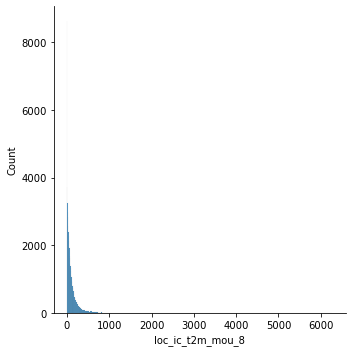

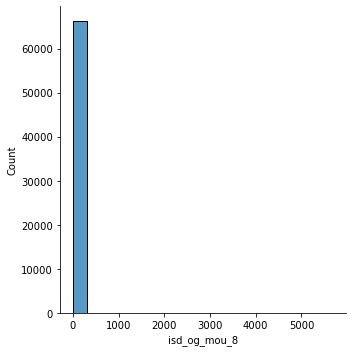

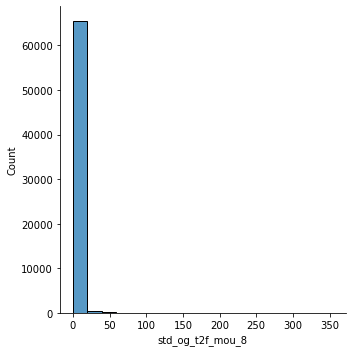

In [31]:
sns.displot(df_train['loc_ic_t2m_mou_8' ]);
sns.displot(df_train['isd_og_mou_8' ]);
sns.displot(df_train['std_og_t2f_mou_8' ]);

**Observations**
- Now we have 81 columns with missing values. Extent of missing values is upto 6%
- We will use Median imputation for these missing values, as the data are skewed

In [32]:
## Imputing with median value

impute = SimpleImputer(strategy='median')
impute_cols = temp1.index.values

df_train[impute_cols] = impute.fit_transform(df_train[impute_cols])
df_test[impute_cols] = impute.transform(df_test[impute_cols])

In [33]:
df_train.isna().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                     0
onnet_mou_7                     0
onnet_mou_8                     0
offnet_mou_6                    0
offnet_mou_7                    0
offnet_mou_8                    0
roam_ic_mou_6                   0
roam_ic_mou_7                   0
roam_ic_mou_8                   0
roam_og_mou_6                   0
roam_og_mou_7                   0
roam_og_mou_8                   0
loc_og_t2t_mou_6                0
loc_og_t2t_mou_7                0
loc_og_t2t_mou_8                0
loc_og_t2m_mou_6                0
loc_og_t2m_mou_7                0
loc_og_t2m_mou_8                0
loc_og_t2f_mou_6                0
loc_og_t2f_mou_7                0
loc_og_t2f_mou_8                0
loc_og_t2c_mou_6                0
loc_og_t2c_mou_7                0
loc_og_t2c_mou_8                0
loc_og_mou_6                    0
loc_og_mou_7                    0
loc_og_mou_8  

## Outliers/Extreme Values

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 158 entries, arpu_6 to churn_probability
dtypes: datetime64[ns](6), float64(126), int64(26)
memory usage: 84.9 MB


In [35]:
non_date_cols = df_train.select_dtypes(exclude='datetime64[ns]').columns.to_list()
non_date_cols.pop(-1)
len(non_date_cols)

151

In [36]:
df_out = pd.DataFrame(columns=['Train_max', 'Test_max', 'Train_min', 'Test_min'], index=non_date_cols)
df_out['Train_max'] = df_train[non_date_cols].max(axis=0)
df_out['Test_max'] = df_test[non_date_cols].max(axis=0)
df_out['Train_min'] = df_train[non_date_cols].min(axis=0)
df_out['Test_min'] = df_test[non_date_cols].min(axis=0)
df_out

,Train_max,Test_max,Train_min,Test_min
arpu_6,27731.088,10955.066,-2258.709,-185.043
arpu_7,35145.834,13224.119,-1289.715,-2014.045
arpu_8,33543.624,13505.996,-945.808,-146.859
onnet_mou_6,7376.710,6944.360,0.000,0.000
onnet_mou_7,8157.780,7411.010,0.000,0.000
onnet_mou_8,10752.560,6723.790,0.000,0.000
offnet_mou_6,8362.360,6962.460,0.000,0.000
offnet_mou_7,7043.980,9667.130,0.000,0.000
offnet_mou_8,14007.340,13547.840,0.000,0.000
roam_ic_mou_6,2850.980,13724.380,0.000,0.000


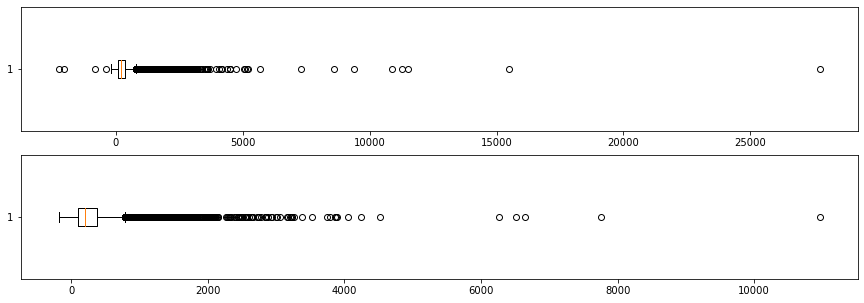

In [37]:
fig , ax = plt.subplots(2, 1)
ax[0].boxplot(df_train['arpu_6'], vert = False)
ax[1].boxplot(df_test['arpu_6'], vert = False)
plt.show()

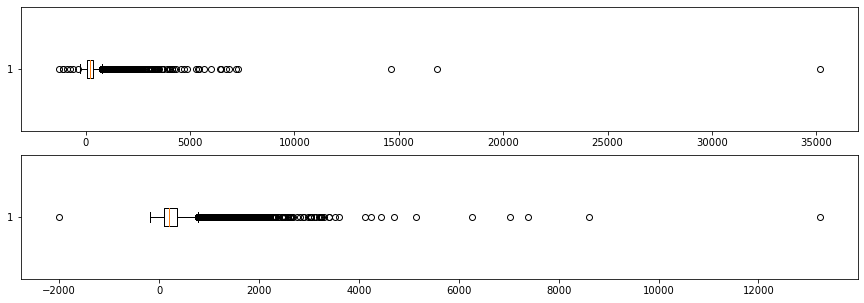

In [38]:
fig , ax = plt.subplots(2, 1)
ax[0].boxplot(df_train['arpu_7'], vert = False)
ax[1].boxplot(df_test['arpu_7'], vert = False)
plt.show()

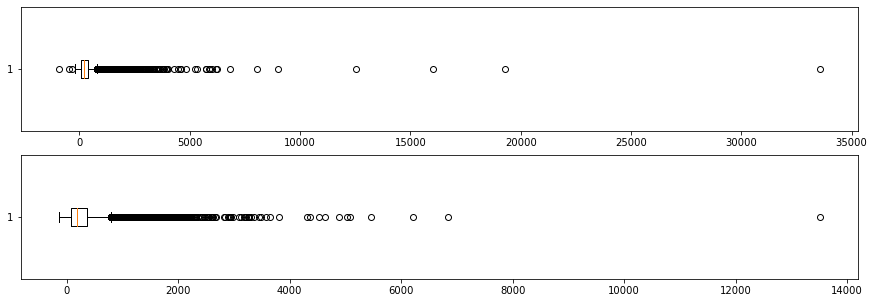

In [39]:
fig , ax = plt.subplots(2, 1)
ax[0].boxplot(df_train['arpu_8'], vert = False)
ax[1].boxplot(df_test['arpu_8'], vert = False)
plt.show()

**Observations**
- Some features in the Training data has extreme values compared to Test set eg. ARPU features
- We can cap these extreme values 
- Some features in the Training data has much smaller range compared to Test data, eg. ROAM INCOMING, this might lead to unreliable predictions

In [40]:
df_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,2014-06-12,2014-07-10,2014-08-26,0,0,0,NaT,2014-07-08,NaT,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.0

In [41]:
## Columns having Extreme values both higher and lower values
max_cols = df_out[df_out['Train_max']>df_out['Test_max']*1.5].index.values
min_cols = df_out[df_out['Train_min']<df_out['Test_min']*1.5].index.values

In [42]:
%%time
### replacing the extreme (max) values with 1.5times the values from test data

for col in max_cols:
    df_train[col] = df_train[col].apply(lambda x: df_test[col].max(axis=0)*1.5 if x>df_test[col].max(axis=0)*1.5 else x)

CPU times: total: 0 ns
Wall time: 0 ns


In [43]:
%%time
### replacing the extreme (min) values with 1.5times the values from test data

for col in min_cols:
    df_train[col] = df_train[col].apply(lambda x: df_test[col].max(axis=0)*1.5 if x>df_test[col].max(axis=0)*1.5 else x)

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
## Saving and loading the data to save rerun time 
# df_train.to_csv('train_wo_extreme.csv')

df_train = pd.read_csv("train_wo_extreme.csv", index_col = 0)
df_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77.0,65.0,10.0,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0.0,145.0,50.0,0,145,50,2014-06-12,2014-07-10,2014-08-26,0,0,0,NaN,2014-07-08,NaN,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,1,0.0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,

# Feature Engineering

- We have 3 consequitvie months (month 6, 7, 8) metrics on call, data usage and recharge related

- It is observed that when a customer churn, last 3 month depicts the 3 phases a customer goes through - steady phase where everythings is ok, trigger phase - when customer start looking for change, action pahse - when cutomer decide to moveout.
- we planned to introduce new features that capture this behaviour of the customer
- We will take relative difference in the usage and recharge from month 6 to month 7, month 7 and to month 8 and from month 6 to 8. Also we will introduce a flage variable that indicate the direction of change, 1 for postive change 0 for no change -1 for negitive change
- we will extract last day of recharge from the month of 6, 7, and 8 for both call and data

### Creating Month-on-Month Change variable

In [45]:
## fucntion to compute % change in month on month usage and recharge

def relative_change(df, l):
    c1 = l[0]
    c2 = l[1]
    c3 = l[2]
    
    
    c4_name = '%change_'+c1.split('_6')[0]+'_6to7'
    c5_name = '%change_'+c1.split('_6')[0]+'_7to8'
    c6_name = '%change_'+c1.split('_6')[0]+'_6to8'
    
    c4 = np.round((df[c2] - df[c1])*1/df[c1], 3)
    inf_ind_c4 = c4.index[np.isinf(c4)]
    c4[inf_ind_c4] = np.round(df[c2][inf_ind_c4]*1, decimals=3)
    
    neg_ind_c4 = c4.index[np.where(c4==-1)]
    c4[neg_ind_c4] = np.round(df[c1][neg_ind_c4]*-1, decimals=3)
    c4.fillna(0, inplace = True)
    
    c5 = np.round((df[c3] - df[c2])*1/df[c2], 3)
    inf_ind_c5 = c5.index[np.isinf(c5)]
    c5[inf_ind_c5] = np.round(df[c3][inf_ind_c5]*1, decimals=3)
    
    neg_ind_c5 = c5.index[np.where(c5==-1)]
    c5[neg_ind_c5] = np.round(df[c2][neg_ind_c5]*-1, decimals=3)
    c5.fillna(0, inplace = True)
    
    c6 = np.round((df[c3] - df[c1])*1/df_train[c1], 3)
    inf_ind_c6 = c6.index[np.isinf(c6)]
    c6[inf_ind_c6] = np.round(df[c3][inf_ind_c6]*1, decimals=3)
    
    neg_ind_c6 = c6.index[np.where(c6==-1)]
    c6[neg_ind_c6] = np.round(df[c1][neg_ind_c6]*-1, decimals=3)
    c6.fillna(0, inplace = True)
    
    df[c4_name] = c4
    df[c5_name] = c5
    df[c6_name] = c6
    
    return df


In [46]:
## fucntion to compute direction of change in month on month usage and recharge

def change(df, l):
    c1 = l[0]
    c2 = l[1]
    c3 = l[2]
    
    
    c4_name = 'change_'+c1.split('_6')[0]+'_6to7'
    c5_name = 'change_'+c1.split('_6')[0]+'_7to8'
    c6_name = 'change_'+c1.split('_6')[0]+'_6to8'
    
    c4 = np.where(df[c2]>df[c1], 1, np.where(df[c2]==df[c1], 0, -1))
    c5 = np.where(df[c3]>df[c2], 1, np.where(df[c3]==df[c2], 0, -1))
    c6 = np.where(df[c3]>df[c1], 1, np.where(df[c3]==df[c1], 0, -1))
    
    df[c4_name] = c4
    df[c5_name] = c5
    df[c6_name] = c6
    
    return df

In [47]:
## Features used for computing derived values 
## %Changes in usage and recharge month-on-month
## Direction of change is usage and recharge month-on-month

feature_eng_vars_1 = [["arpu_6","arpu_7","arpu_8"],
                      ["onnet_mou_6","onnet_mou_7","onnet_mou_8"],
                      ["offnet_mou_6","offnet_mou_7","offnet_mou_8"],
                      ["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"],
                      ["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"],
                      ["loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8"],
                      ["loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8"],
                      ["loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8"],
                      ["loc_og_t2c_mou_6", "loc_og_t2c_mou_7", "loc_og_t2c_mou_8"], 
                      ["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"],
                      ["std_og_t2t_mou_6", "std_og_t2t_mou_7", "std_og_t2t_mou_8"],
                      ["std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8"],
                      ["std_og_t2f_mou_6", "std_og_t2f_mou_7", "std_og_t2f_mou_8"],
                      ["std_og_mou_6","std_og_mou_7","std_og_mou_8"],
                      ["isd_og_mou_6","isd_og_mou_7","isd_og_mou_8"],
                      ["spl_og_mou_6","spl_og_mou_7","spl_og_mou_8"],
                      ["og_others_6","og_others_7","og_others_8"],
                      ["total_og_mou_6","total_og_mou_7","total_og_mou_8"],
                      ["loc_ic_t2t_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2t_mou_8"],
                      ["loc_ic_t2m_mou_6", "loc_ic_t2m_mou_7", "loc_ic_t2m_mou_8"],
                      ["loc_ic_t2f_mou_6", "loc_ic_t2f_mou_7", "loc_ic_t2f_mou_8"],
                      ["loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8"],
                      ["std_ic_t2t_mou_6", "std_ic_t2t_mou_7", "std_ic_t2t_mou_8"],
                      ["std_ic_t2m_mou_6", "std_ic_t2m_mou_7", "std_ic_t2m_mou_8"],
                      ["std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8"],
                      ["std_ic_mou_6","std_ic_mou_7","std_ic_mou_8"],
                      ["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"],
                      ["spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8"],
                      ["isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8"],
                      ["ic_others_6","ic_others_7","ic_others_8"],
                      ["total_rech_num_6","total_rech_num_7","total_rech_num_8"],
                      ["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"],
                      ["max_rech_amt_6","max_rech_amt_7","max_rech_amt_8"],
                      ["last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8"],
                      ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8"],
                      ["max_rech_data_6", "max_rech_data_7", "max_rech_data_8"],
                      ["count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8"],
                      ["count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8"],                      
                      ["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8"],
                      ["vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8"],
                      ["vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8"],
                      ["arpu_3g_6","arpu_3g_7","arpu_3g_8"],
                      ["arpu_2g_6","arpu_2g_7","arpu_2g_8"],
                      
                     ]

In [48]:
df_train.shape

(69999, 158)

In [49]:
%%time
### Creating new features for Train Data

for l in feature_eng_vars_1:
    relative_change(df_train, l)
    change(df_train, l)
df_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,%change_arpu_6to7,%change_arpu_7to8,%change_arpu_6to8,change_arpu_6to7,change_arpu_7to8,change_arpu_6to8,%change_onnet_mou_6to7,%change_onnet_mou_7to8,%change_onnet_mou_6to8,change_onnet_mou_6to7,change_onnet_mou_7to8,change_onnet_mou_6to8,%change_offnet_mou_6to7,%change_offnet_mou_7to8,%change_offnet_mou_6to8,change_offnet_mou_6to7,change_offnet_mou_7to8,...,change_std_og_mou_6to8,%change_isd_og_mou_6to7,%change_isd_og_mou_7to8,%change_isd_og_mou_6to8,change_isd_og_mou_6to7,change_isd_og_mou_7to8,change_isd_og_mou_6to8,%change_spl_og_mou_6to7,%change_spl_og_mou_7to8,%change_spl_og_mou_6to8,change_spl_og_mou_6to7,change_spl_og_mou_7to8,change_spl_og_mou_6to8,%change_og_others_6to7,%change_og_others_7to8,%change_og_others_6to8,change_og_others_6to7,change_og_others_7to8,change_og_others_6to8,%change_total_og_mou_6to7,%change_total_og_mou_7to8,%change_total_og_mou_6to8,change_total_og_mou_6to7,change_total_og_mou_7to8,change_total_og_mou_6to8,%change_loc_ic_t2t_mou_6to7,%change_loc_ic_t2t_mou_7to8,%change_loc_ic_t2t_mou_6to8,change_loc_ic_t2t_mou_6to7,change_loc_ic_t2t_mou_7to8,change_loc_ic_t2t_mou_6to8,%change_loc_ic_t2m_mou_6to7,%change_loc_ic_t2m_mou_7to8,%change_loc_ic_t2m_mou_6to8,change_loc_ic_t2m_mou_6to7,change_loc_ic_t2m_mou_7to8,change_loc_ic_t2m_mou_6to8,%change_loc_ic_t2f_mou_6to7,%change_loc_ic_t2f_mou_7to8,%change_loc_ic_t2f_mou_6to8,change_loc_ic_t2f_mou_6to7,change_loc_ic_t2f_mou_7to8,change_loc_ic_t2f_mou_6to8,%change_loc_ic_mou_6to7,%change_loc_ic_mou_7to8,%change_loc_ic_mou_6to8,change_loc_ic_mou_6to7,change_loc_ic_mou_7to8,change_loc_ic_mou_6to8,%change_std_ic_t2t_mou_6to7,%change_std_ic_t2t_mou_7to8,%change_std_ic_t2t_mou_

In [50]:
df_train.shape

(69999, 416)

In [169]:
df_test.shape

(30000, 304)

In [51]:
### Creating new features for Test Data

for l in feature_eng_vars_1:
    relative_change(df_test, l)
    change(df_test, l)
df_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,%change_arpu_6to7,%change_arpu_7to8,%change_arpu_6to8,change_arpu_6to7,change_arpu_7to8,change_arpu_6to8,%change_onnet_mou_6to7,%change_onnet_mou_7to8,%change_onnet_mou_6to8,change_onnet_mou_6to7,change_onnet_mou_7to8,change_onnet_mou_6to8,%change_offnet_mou_6to7,%change_offnet_mou_7to8,%change_offnet_mou_6to8,change_offnet_mou_6to7,change_offnet_mou_7to8,change_offnet_mou_6to8,...,change_std_og_mou_6to8,%change_isd_og_mou_6to7,%change_isd_og_mou_7to8,%change_isd_og_mou_6to8,change_isd_og_mou_6to7,change_isd_og_mou_7to8,change_isd_og_mou_6to8,%change_spl_og_mou_6to7,%change_spl_og_mou_7to8,%change_spl_og_mou_6to8,change_spl_og_mou_6to7,change_spl_og_mou_7to8,change_spl_og_mou_6to8,%change_og_others_6to7,%change_og_others_7to8,%change_og_others_6to8,change_og_others_6to7,change_og_others_7to8,change_og_others_6to8,%change_total_og_mou_6to7,%change_total_og_mou_7to8,%change_total_og_mou_6to8,change_total_og_mou_6to7,change_total_og_mou_7to8,change_total_og_mou_6to8,%change_loc_ic_t2t_mou_6to7,%change_loc_ic_t2t_mou_7to8,%change_loc_ic_t2t_mou_6to8,change_loc_ic_t2t_mou_6to7,change_loc_ic_t2t_mou_7to8,change_loc_ic_t2t_mou_6to8,%change_loc_ic_t2m_mou_6to7,%change_loc_ic_t2m_mou_7to8,%change_loc_ic_t2m_mou_6to8,change_loc_ic_t2m_mou_6to7,change_loc_ic_t2m_mou_7to8,change_loc_ic_t2m_mou_6to8,%change_loc_ic_t2f_mou_6to7,%change_loc_ic_t2f_mou_7to8,%change_loc_ic_t2f_mou_6to8,change_loc_ic_t2f_mou_6to7,change_loc_ic_t2f_mou_7to8,change_loc_ic_t2f_mou_6to8,%change_loc_ic_mou_6to7,%change_loc_ic_mou_7to8,%change_loc_ic_mou_6to8,change_loc_ic_mou_6to7,change_loc_ic_mou_7to8,change_loc_ic_mou_6to8,%change_std_ic_t2t_mou_6to7,%change_std_ic_t2t_mou_7to8,%change_std_ic_t2t

In [52]:
df_test.shape

(30000, 415)

### Droping the features that are used to create derived variables

In [53]:
## Following features will be dropped 

drop_features = ["onnet_mou_6","onnet_mou_7","onnet_mou_8",
                 "offnet_mou_6","offnet_mou_7","offnet_mou_8",
                 "loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8",
                 "loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8",
                 "loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8",
                 "loc_og_t2c_mou_6", "loc_og_t2c_mou_7", "loc_og_t2c_mou_8",
                 "loc_og_mou_6","loc_og_mou_7","loc_og_mou_8",
                 "std_og_t2t_mou_6", "std_og_t2t_mou_7", "std_og_t2t_mou_8",
                 "std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8",
                 "std_og_t2f_mou_6", "std_og_t2f_mou_7", "std_og_t2f_mou_8",
                 "std_og_mou_6","std_og_mou_7","std_og_mou_8",
                 "isd_og_mou_6","isd_og_mou_7","isd_og_mou_8",
                 "spl_og_mou_6","spl_og_mou_7","spl_og_mou_8",
                 "og_others_6","og_others_7","og_others_8",
                 "loc_ic_t2t_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2t_mou_8",
                 "loc_ic_t2m_mou_6", "loc_ic_t2m_mou_7", "loc_ic_t2m_mou_8",
                 "loc_ic_t2f_mou_6", "loc_ic_t2f_mou_7", "loc_ic_t2f_mou_8",
                 "loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8",
                 "std_ic_t2t_mou_6", "std_ic_t2t_mou_7", "std_ic_t2t_mou_8",
                 "std_ic_t2m_mou_6", "std_ic_t2m_mou_7", "std_ic_t2m_mou_8",
                 "std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8",
                 "std_ic_mou_6","std_ic_mou_7","std_ic_mou_8",
                 "total_ic_mou_6","total_ic_mou_7","total_ic_mou_8",
                 "spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8",
                 "isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8",
                 "ic_others_6","ic_others_7","ic_others_8", 
                 "max_rech_amt_6","max_rech_amt_7","max_rech_amt_8",
                 "last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8",
                 "total_rech_data_6", "total_rech_data_7", "total_rech_data_8",
                 "max_rech_data_6", "max_rech_data_7", "max_rech_data_8",
                 "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8",
                 "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8",
                 "av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8",
                 "vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8",
                 "vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8",
                 "arpu_3g_6","arpu_3g_7","arpu_3g_8",
                 "arpu_2g_6","arpu_2g_7","arpu_2g_8",
                ]

In [54]:
## Following features will be retained as we feel these features might has good information

["arpu_6","arpu_7","arpu_8", 
 "roam_ic_mou_6","roam_ic_mou_7", "roam_ic_mou_8", 
 "roam_og_mou_6", "roam_og_mou_7","roam_og_mou_8", 
 "total_og_mou_6","total_og_mou_7","total_og_mou_8", 
 "total_rech_amt_6","total_rech_amt_7","total_rech_amt_8",
 "total_rech_num_6","total_rech_num_7","total_rech_num_8"
]

['arpu_6',
 'arpu_7',
 'arpu_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8']

In [55]:
## Droping the above columns
df_train.drop(columns=drop_features, inplace=True)
df_test.drop(columns=drop_features, inplace=True)

print(df_train.shape)
print(df_test.shape)

(69999, 305)
(30000, 304)


In [56]:
df_train.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,%change_arpu_6to7,%change_arpu_7to8,%change_arpu_6to8,change_arpu_6to7,change_arpu_7to8,change_arpu_6to8,%change_onnet_mou_6to7,%change_onnet_mou_7to8,%change_onnet_mou_6to8,change_onnet_mou_6to7,change_onnet_mou_7to8,change_onnet_mou_6to8,%change_offnet_mou_6to7,%change_offnet_mou_7to8,%change_offnet_mou_6to8,change_offnet_mou_6to7,change_offnet_mou_7to8,change_offnet_mou_6to8,%change_roam_ic_mou_6to7,%change_roam_ic_mou_7to8,%change_roam_ic_mou_6to8,change_roam_ic_mou_6to7,change_roam_ic_mou_7to8,change_roam_ic_mou_6to8,%change_roam_og_mou_6to7,%change_roam_og_mou_7to8,%change_roam_og_mou_6to8,change_roam_og_mou_6to7,change_roam_og_mou_7to8,change_roam_og_mou_6to8,%change_loc_og_t2t_mou_6to7,%change_loc_og_t2t_mou_7to8,%change_loc_og_t2t_mou_6to8,change_loc_og_t2t_mou_6to7,change_loc_og_t2t_mou_7to8,change_loc_og_t2t_mou_6to8,%change_loc_og_t2m_mou_6to7,%change_loc_og_t2m_mou_7to8,%change_loc_og_t2m_mou_6to8,change_loc_og_t2m_mou_6to7,change_loc_og_t2m_mou_7to8,change_loc_og_t2m_mou_6to8,%change_loc_og_t2f_mou_6to7,%change_loc_og_t2f_mou_7to8,%change_loc_og_t2f_mou_6to8,change_loc_og_t2f_mou_6to7,change_loc_og_t2f_mou_7to8,change_loc_og_t2f_mou_6to8,%change_loc_og_t2c_mou_6to7,%change_loc_og_t2c_mou_7to8,%change_loc_og_t2c_mou_6to8,change_loc_og_t2c_mou_6to7,change_loc_og_t2c_mou_7to8,change_loc_og_t2c_mou_6to8,%change_loc_og_mou_6to7,%change_loc_og_mou_7to8,%change_loc_og_mou_6to8,change_loc_og_mou_6to7,change_loc_og_mou_7to8,change_loc_og_mou_6to8,%change_std_og_t2t_mou_6to7,%change_std_og_t2t_mou_7to8,%change_std_og_t2t_mou_6to8,change_std_og_t2t_mou_6to7,change_std_og_t2t_mou_7to8,change_std_og_t2t_mou_6to8,%change_std_og_t2m_mou_6to7,%change_std_og_t2m_mou_7to8,%change_std_og_t2m_mou_6to8,change_std_og_t2m_mou_6to7,change_std_og_t2m_mou_7to8,change_std_og_t2m_mou_6to8,%change_std_og_t2f_mou_6to7,%change_std_og_t2f_mou_7to8,%change_std_og_t2f_mou_6to8,change_std_og_t2f_mou_6to7,change_std_og_t2f_mou_7to8,change_std_og_t2f_mou_6to8,%change_std_og_mou_6to7,%change_std_og_mou_7to8,%change_std_og_mou_6to8,change_std_og_mou_6to7,change_std_og_mou_7to8,change_std_og_mou_6to8,%change_isd_og_mou_6to7,%change_isd_og_mou_7to8,%change_isd_og_mou_6to8,change_isd_og_mou_6to7,change_isd_og_mou_7to8,change_isd_og_mou_6to8,%change_spl_og_mou_6to7,%change_spl_og_mou_7to8,%change_spl_og_mou_6to8,change_spl_og_mou_6to7,change_spl_og_mou_7to8,change_spl_og_mou_6to8,%change_og_others_6to7,%change_og_others_7to8,%change_og_others_6to8,change_og_others_6to7,change_og_others_7to8,change_og_others_6to8,%change_total_og_mou_6to7,%change_total_og_mou_7to8,%change_total_og_mou_6to8,change_total_og_mou_6to7,change_total_og_mou_7to8,change_total_og_mou_6to8,%change_loc_ic_t2t_mou_6to7,%change_loc_ic_t2t_mou_7to8,%change_loc_ic_t2t_mou_6to8,change_loc_ic_t2t_mou_6to7,change_loc_ic_t2t_mou_7to8,change_loc_ic_t2t_mou_6to8,%change_loc_ic_t2m_mou_6to7,%change_loc_ic_t2m_mou_7to8,%change_loc_ic_t2m_mou_6to8,change_loc_ic_t2m_mou_6to7,change_loc_ic_t2m_mou_7to8,change_loc_ic_t2m_mou_6to8,%change_loc_ic_t2f_mou_6to7,%change_loc_ic_t2f_mou_7to8,%change_loc_ic_t2f_mou_6to8,change_loc_ic_t2f_mou_6to7,change_loc_ic_t2f_mou_7to8,change_loc_ic_t2f_mou_6to8,%change_loc_ic_mou_6to7,%change_loc_ic_mou_7to8,%change_loc_ic_mou_6to8,change_loc_ic_mou_6to7,change_loc_ic_mou_7to8,change_loc_ic_mou_6to8,%change_

### Extracting day of last rechage from date_time field

In [57]:
dt_columns
df_train[dt_columns] = df_train[dt_columns].astype('datetime64[ns]')

In [58]:
## Creating day column for train data set
df_train['day_last_rech_6'] = df_train['date_of_last_rech_6'].dt.day
df_train['day_last_rech_7'] = df_train['date_of_last_rech_7'].dt.day
df_train['day_last_rech_8'] = df_train['date_of_last_rech_8'].dt.day

df_train['day_last_rech_data_6'] = df_train['date_of_last_rech_data_6'].dt.day
df_train['day_last_rech_data_7'] = df_train['date_of_last_rech_data_7'].dt.day
df_train['day_last_rech_data_8'] = df_train['date_of_last_rech_data_8'].dt.day


## Creating day column for test data set
df_test['day_last_rech_6'] = df_test['date_of_last_rech_6'].dt.day
df_test['day_last_rech_7'] = df_test['date_of_last_rech_7'].dt.day
df_test['day_last_rech_8'] = df_test['date_of_last_rech_8'].dt.day

df_test['day_last_rech_data_6'] = df_test['date_of_last_rech_data_6'].dt.day
df_test['day_last_rech_data_7'] = df_test['date_of_last_rech_data_7'].dt.day
df_test['day_last_rech_data_8'] = df_test['date_of_last_rech_data_8'].dt.day

In [59]:
day_cols = ['day_last_rech_6', 'day_last_rech_7', 'day_last_rech_8',
           'day_last_rech_data_6', 'day_last_rech_data_7', 'day_last_rech_data_8']

In [60]:
df_train[day_cols]

,day_last_rech_6,day_last_rech_7,day_last_rech_8,day_last_rech_data_6,day_last_rech_data_7,day_last_rech_data_8
id,,,,,,
0,22.0,10.0,24.0,NaN,NaN,NaN
1,12.0,10.0,26.0,NaN,8.0,NaN
2,11.0,22.0,24.0,NaN,NaN,NaN
3,15.0,21.0,25.0,NaN,NaN,NaN
4,25.0,26.0,30.0,25.0,23.0,20.0
...,...,...,...,...,...,...
69994,18.0,31.0,31.0,NaN,31.0,21.0
69995,28.0,31.0,27.0,NaN,NaN,NaN
69996,25.0,30.0,29.0,NaN,NaN,NaN


In [61]:
## Chaing the data type to float

df_train[day_cols] = df_train[day_cols].astype('float')
df_test[day_cols] = df_test[day_cols].astype('float')

df_train[day_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day_last_rech_6       68898 non-null  float64
 1   day_last_rech_7       68765 non-null  float64
 2   day_last_rech_8       67538 non-null  float64
 3   day_last_rech_data_6  17568 non-null  float64
 4   day_last_rech_data_7  17865 non-null  float64
 5   day_last_rech_data_8  18417 non-null  float64
dtypes: float64(6)
memory usage: 5.8 MB


In [62]:
### Dropping the date cloumns

df_train.drop(columns=dt_columns, inplace=True)
df_test.drop(columns=dt_columns, inplace=True)

df_train.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,%change_arpu_6to7,%change_arpu_7to8,%change_arpu_6to8,change_arpu_6to7,change_arpu_7to8,change_arpu_6to8,%change_onnet_mou_6to7,%change_onnet_mou_7to8,%change_onnet_mou_6to8,change_onnet_mou_6to7,change_onnet_mou_7to8,change_onnet_mou_6to8,%change_offnet_mou_6to7,%change_offnet_mou_7to8,%change_offnet_mou_6to8,change_offnet_mou_6to7,change_offnet_mou_7to8,change_offnet_mou_6to8,%change_roam_ic_mou_6to7,%change_roam_ic_mou_7to8,%change_roam_ic_mou_6to8,change_roam_ic_mou_6to7,change_roam_ic_mou_7to8,change_roam_ic_mou_6to8,%change_roam_og_mou_6to7,%change_roam_og_mou_7to8,%change_roam_og_mou_6to8,change_roam_og_mou_6to7,change_roam_og_mou_7to8,change_roam_og_mou_6to8,%change_loc_og_t2t_mou_6to7,%change_loc_og_t2t_mou_7to8,%change_loc_og_t2t_mou_6to8,change_loc_og_t2t_mou_6to7,change_loc_og_t2t_mou_7to8,change_loc_og_t2t_mou_6to8,%change_loc_og_t2m_mou_6to7,%change_loc_og_t2m_mou_7to8,%change_loc_og_t2m_mou_6to8,change_loc_og_t2m_mou_6to7,change_loc_og_t2m_mou_7to8,change_loc_og_t2m_mou_6to8,%change_loc_og_t2f_mou_6to7,%change_loc_og_t2f_mou_7to8,%change_loc_og_t2f_mou_6to8,change_loc_og_t2f_mou_6to7,change_loc_og_t2f_mou_7to8,change_loc_og_t2f_mou_6to8,%change_loc_og_t2c_mou_6to7,%change_loc_og_t2c_mou_7to8,%change_loc_og_t2c_mou_6to8,change_loc_og_t2c_mou_6to7,change_loc_og_t2c_mou_7to8,change_loc_og_t2c_mou_6to8,%change_loc_og_mou_6to7,%change_loc_og_mou_7to8,%change_loc_og_mou_6to8,change_loc_og_mou_6to7,change_loc_og_mou_7to8,change_loc_og_mou_6to8,%change_std_og_t2t_mou_6to7,%change_std_og_t2t_mou_7to8,%change_std_og_t2t_mou_6to8,change_std_og_t2t_mou_6to7,change_std_og_t2t_mou_7to8,change_std_og_t2t_mou_6to8,%change_std_og_t2m_mou_6to7,%change_std_og_t2m_mou_7to8,%change_std_og_t2m_mou_6to8,change_std_og_t2m_mou_6to7,change_std_og_t2m_mou_7to8,change_std_og_t2m_mou_6to8,%change_std_og_t2f_mou_6to7,%change_std_og_t2f_mou_7to8,%change_std_og_t2f_mou_6to8,change_std_og_t2f_mou_6to7,change_std_og_t2f_mou_7to8,change_std_og_t2f_mou_6to8,%change_std_og_mou_6to7,%change_std_og_mou_7to8,%change_std_og_mou_6to8,change_std_og_mou_6to7,change_std_og_mou_7to8,change_std_og_mou_6to8,%change_isd_og_mou_6to7,%change_isd_og_mou_7to8,%change_isd_og_mou_6to8,change_isd_og_mou_6to7,change_isd_og_mou_7to8,change_isd_og_mou_6to8,%change_spl_og_mou_6to7,%change_spl_og_mou_7to8,%change_spl_og_mou_6to8,change_spl_og_mou_6to7,change_spl_og_mou_7to8,change_spl_og_mou_6to8,%change_og_others_6to7,%change_og_others_7to8,%change_og_others_6to8,change_og_others_6to7,change_og_others_7to8,change_og_others_6to8,%change_total_og_mou_6to7,%change_total_og_mou_7to8,%change_total_og_mou_6to8,change_total_og_mou_6to7,change_total_og_mou_7to8,change_total_og_mou_6to8,%change_loc_ic_t2t_mou_6to7,%change_loc_ic_t2t_mou_7to8,%change_loc_ic_t2t_mou_6to8,change_loc_ic_t2t_mou_6to7,change_loc_ic_t2t_mou_7to8,change_loc_ic_t2t_mou_6to8,%change_loc_ic_t2m_mou_6to7,%change_loc_ic_t2m_mou_7to8,%change_loc_ic_t2m_mou_6to8,change_loc_ic_t2m_mou_6to7,change_loc_ic_t2m_mou_7to8,change_loc_ic_t2m_mou_6to8,%change_loc_ic_t2f_mou_6to7,%change_loc_ic_t2f_mou_7to8,%change_loc_ic_t2f_mou_6to8,change_loc_ic_t2f_mou_6to7,change_loc_ic_t2f_mou_7to8,change_loc_ic_t2f_mou_6to8,%change_loc_ic_mou_6to7,%change_loc_ic_mou_7to8,%change_loc_ic_mou_6to8,change_loc_ic_mou_6to7,change_loc_ic_mou_7to8,change_loc_ic_mou_6to8,%change_std_ic_t2t_mou_6to7,%change_std_ic_t2t_mou_7to8,%change_std_ic_t2t_mou_6to8,change_std_ic_t2t_mou_6to7,change_std_ic_t2t_mou_7to8,chang

In [63]:
df_train.isna().sum()

arpu_6                      0
arpu_7                      0
arpu_8                      0
roam_ic_mou_6               0
roam_ic_mou_7               0
                        ...  
day_last_rech_7          1234
day_last_rech_8          2461
day_last_rech_data_6    52431
day_last_rech_data_7    52134
day_last_rech_data_8    51582
Length: 305, dtype: int64

In [64]:
### replacing NaNs in recharge date related columns with separate value - 9999

df_train[day_cols] = df_train[day_cols].fillna(9999)
df_test[day_cols] = df_test[day_cols].fillna(9999)
df_train[day_cols].isna().sum()

day_last_rech_6         0
day_last_rech_7         0
day_last_rech_8         0
day_last_rech_data_6    0
day_last_rech_data_7    0
day_last_rech_data_8    0
dtype: int64

In [65]:
print("Total Missing values in Train data: ", df_train.isna().sum().sum())
print("Total Missing values in Test data: ", df_test.isna().sum().sum())

Total Missing values in Train data:  0
Total Missing values in Test data:  0


# Exploratory Data Analysis

### Pre-built Graphing Functions

In [66]:
#function for plotting factorplots
def auto_factorplots(df,col1,col2,col3,title,ylab):
    temp_factorplot = df[[col1,col2,col3,"churn_probability"]]
    temp_factorplot = pd.melt(temp_factorplot,id_vars = "churn_probability",var_name = "a",value_name = "c")
    sns.factorplot("a",y = "c",hue = "churn_probability", data = temp_factorplot, kind = "boxen",height = 8)
    plt.title("Boxenplots for {}".format(title),fontdict = {"fontweight" : 20, "color" : "red"})
    plt.xlabel("{} split across churn".format(title),fontdict = {"fontweight" : 10, "color" : "green"})
    plt.ylabel("{}".format(ylab),fontdict = {"fontweight" : 10, "color" : "green"})
    plt.show()
    plt.subplot(1,1,1)
    sns.set(rc = {"figure.figsize" : (6,6)})
    sns.pointplot(x = "a", y = "c", hue = "churn_probability",data = temp_factorplot)
    plt.title("Median Trend for {}".format(title),fontdict = {"fontweight" : 20, "color" : "red"})
    plt.xlabel("{} ".format(title),fontdict = {"fontweight" : 10, "color" : "green"})
    plt.ylabel("{}".format(ylab),fontdict = {"fontweight" : 10, "color" : "green"})
    plt.show()

    #function for plotting boxplots
def auto_boxplots(df,col1,col2,col3,title,ylab):
    temp_boxplot = df[[col1,col2,col3]]
    sns.set(rc = {"figure.figsize" : (10,10)})
    sns.boxenplot(data = temp_boxplot, width = 0.25)
    plt.title("Boxenplot for {}".format(title),fontdict = {"fontweight" : 20, "color" : "red"})
    plt.xlabel("{} split across churn".format(title),fontdict = {"fontweight" : 10, "color" : "green"})
    plt.ylabel("{}".format(ylab),fontdict = {"fontweight" : 10, "color" : "green"})
    plt.show()
    plt.subplot(1,1,1)
    sns.set(rc = {"figure.figsize" : (6,6)})
    sns.pointplot(data = df[[col1,col2,col3]])
    plt.title("Median Trend for {}".format(title),fontdict = {"fontweight" : 20, "color" : "red"})
    plt.xlabel("{} ".format(title),fontdict = {"fontweight" : 10, "color" : "green"})
    plt.ylabel("{}".format(ylab),fontdict = {"fontweight" : 10, "color" : "green"})
    plt.show()

## Age on Network

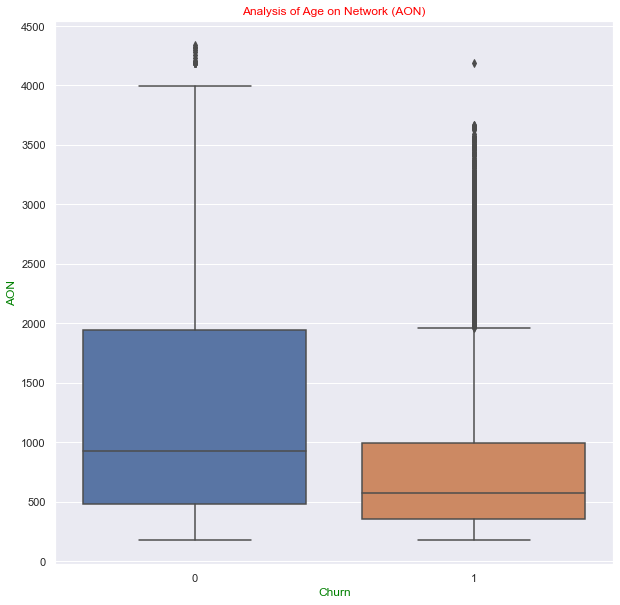

In [67]:
sns.set(rc = {"figure.figsize" : (10,10)})
sns.boxplot(x = df_train.churn_probability, y = df_train.aon)
plt.title("Analysis of Age on Network (AON)",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Churn", fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("AON", fontdict = {"fontweight" : 10, "color" : "green"})
ticks = np.arange(0,5000,500)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
plt.show()

**Obsrvations**
- The Median value of AON for Churned customer is less than Un-churned customer indicating that customer are with network for longer time will remain for longer time

## ARPU for Calls

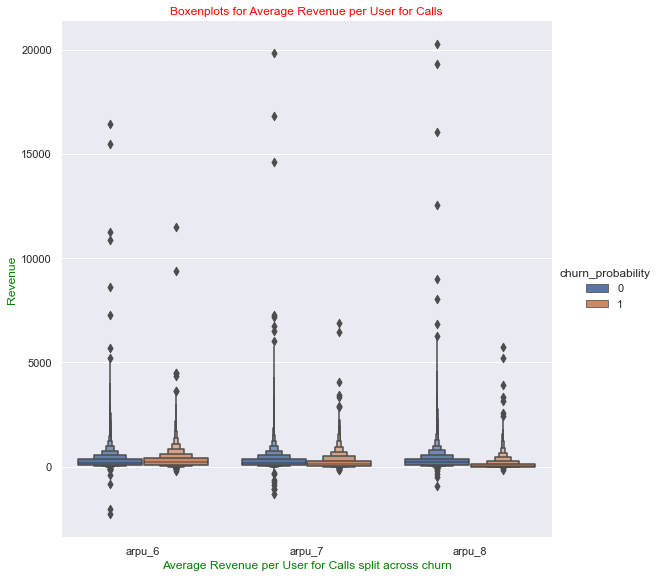

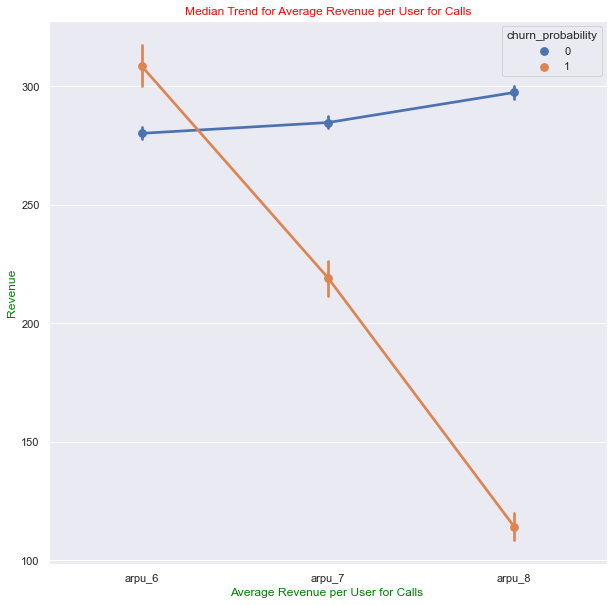

In [68]:
## Box plot for ARPU segmented for Churn Probability and Trend of median values for month 6, 7, and 8

auto_factorplots(df_train,"arpu_6","arpu_7","arpu_8","Average Revenue per User for Calls","Revenue")

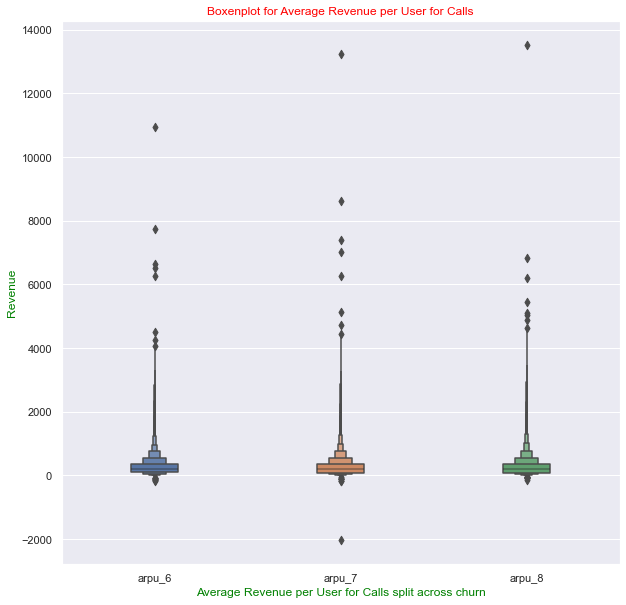

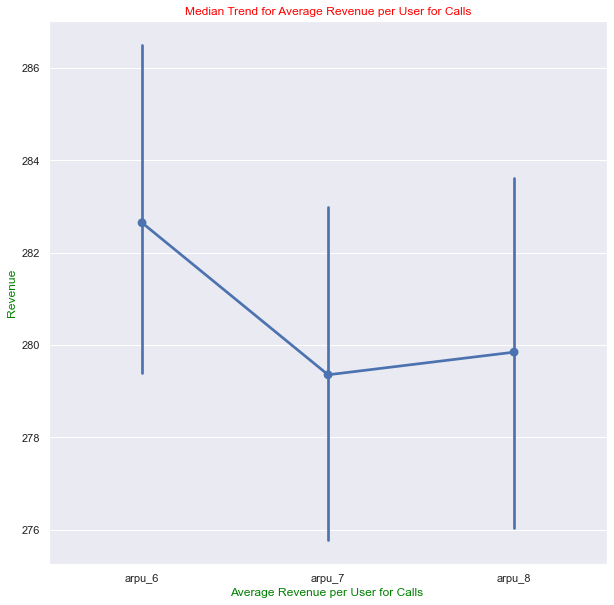

In [69]:
auto_boxplots(df_test,"arpu_6","arpu_7","arpu_8","Average Revenue per User for Calls","Revenue")

**Observations**
- ARPU for month of 7 and 8 has lower median value for churn customer 
- We observe that the median value for ARPU decreases from month 6 to 7 till 8 for Churn Class

## Incoming Roaming Minutes Usage

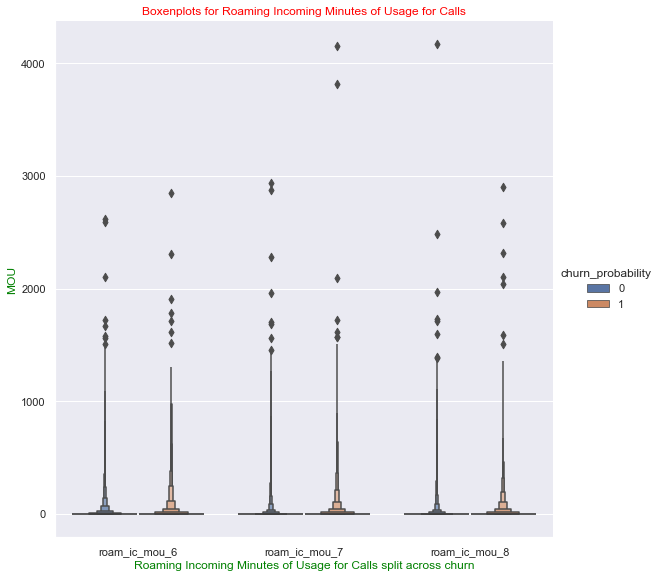

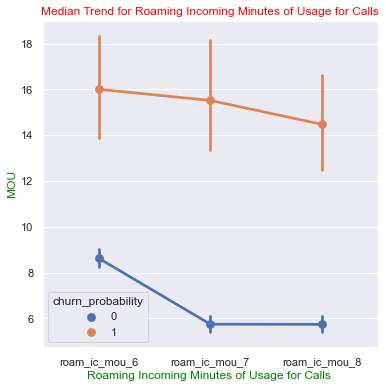

In [70]:
## Box plot for Incoming Roaming segmented for Churn Probability and Trend of median values for month 6, 7, and 8

auto_factorplots(df_train,"roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8","Roaming Incoming Minutes of Usage for Calls","MOU")

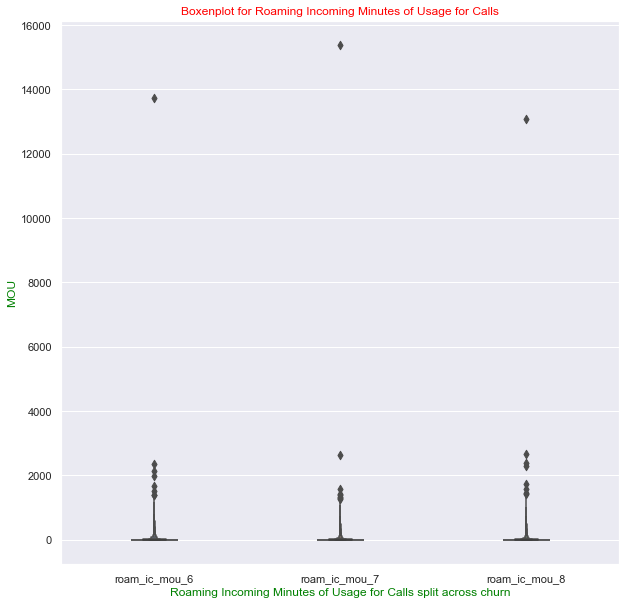

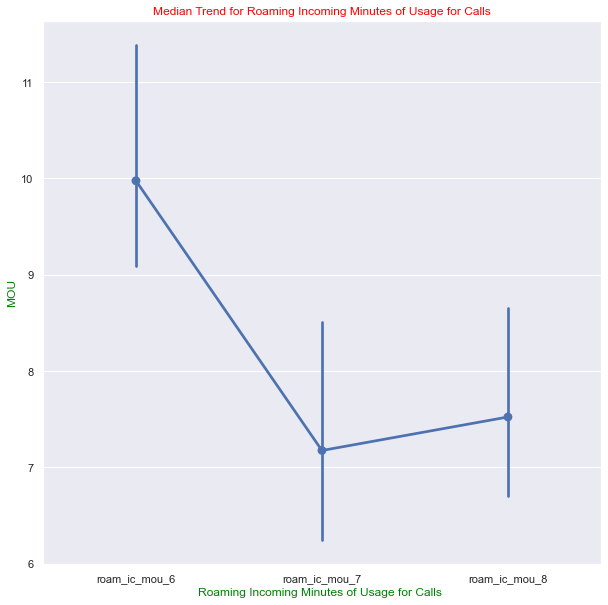

In [71]:
auto_boxplots(df_test,"roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8","Roaming Incoming Minutes of Usage for Calls","MOU")

**Observations**
- The Max values for Roaming in Train data is approximately arround 4000, however these values in train set are at 15000, well outside the range of the training data. 
- These features might leads to unreliable predictions
- We cam also observe that the roaming incoming calls usage are high for churn class

## Outgoing Roaming Minutes Usage

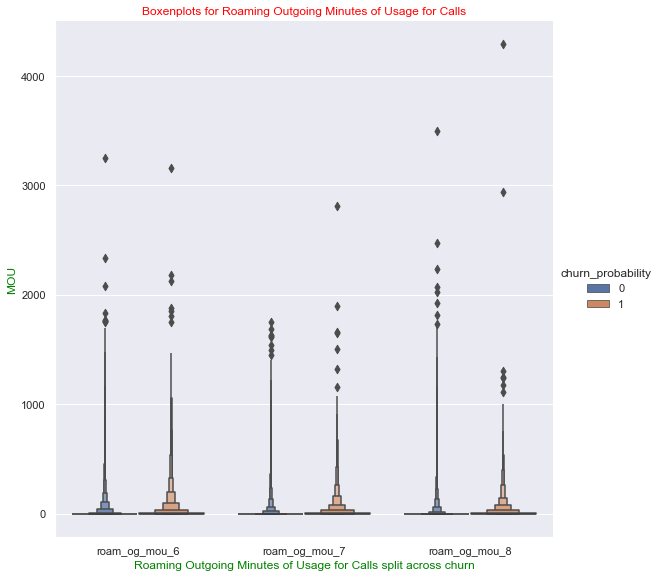

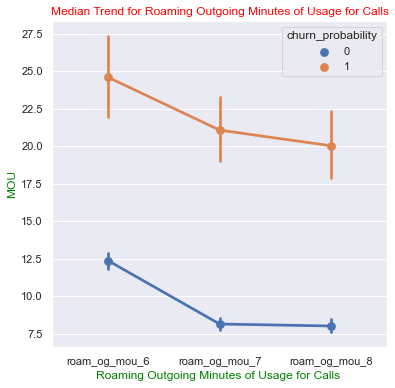

In [72]:
## Box plot for Outgoing Roaming MOU segmented for Churn Probability and Trend of median values for month 6, 7, and 8
auto_factorplots(df_train,"roam_og_mou_6","roam_og_mou_7","roam_og_mou_8","Roaming Outgoing Minutes of Usage for Calls","MOU")

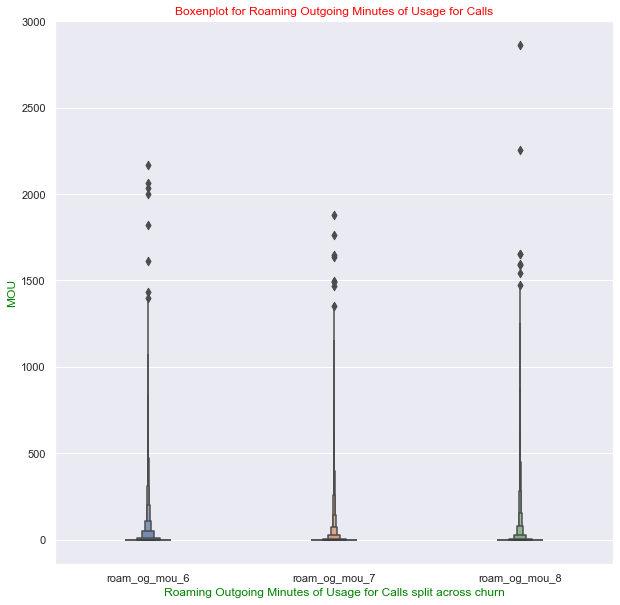

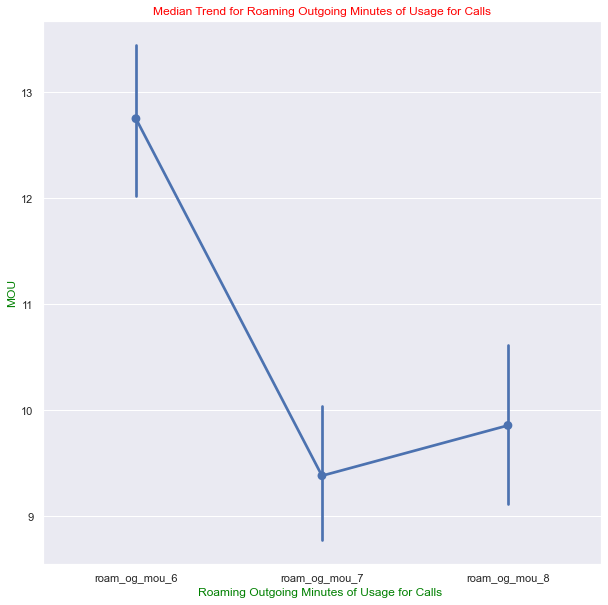

In [73]:
auto_boxplots(df_test,"roam_og_mou_6","roam_og_mou_7","roam_og_mou_8","Roaming Outgoing Minutes of Usage for Calls","MOU")

**Observations**
- We observe that the median value for ARPU decreases from month 6 to 7 till 8 for Churn Class

## Total Outgoing Calls Minutes of Usage

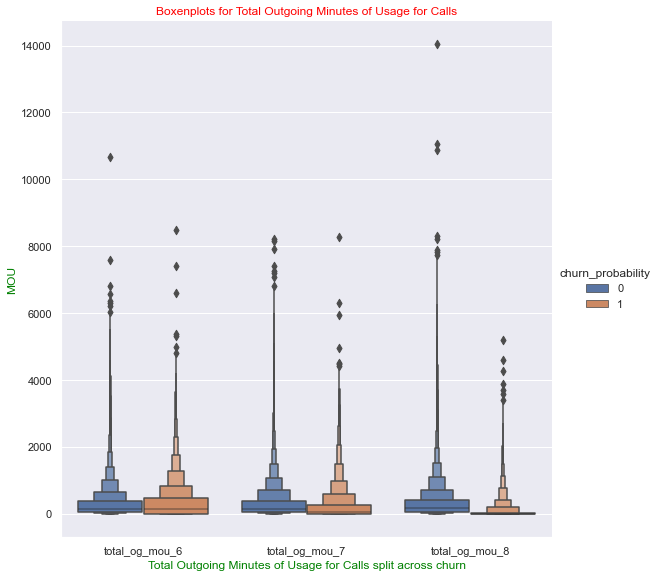

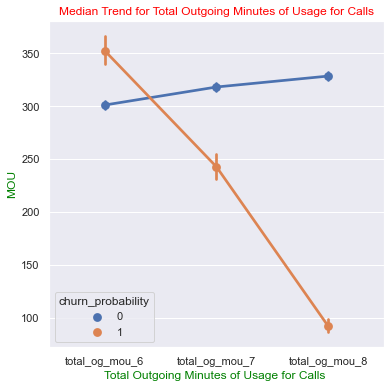

In [74]:
## Box plot for Total Outgoing calls MOU segmented for Churn Probability and Trend of median values for month 6, 7, and 8
auto_factorplots(df_train,"total_og_mou_6","total_og_mou_7","total_og_mou_8","Total Outgoing Minutes of Usage for Calls","MOU")

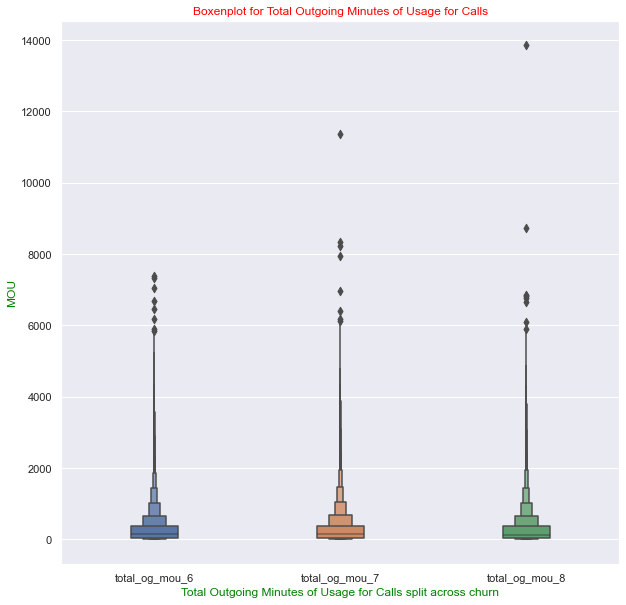

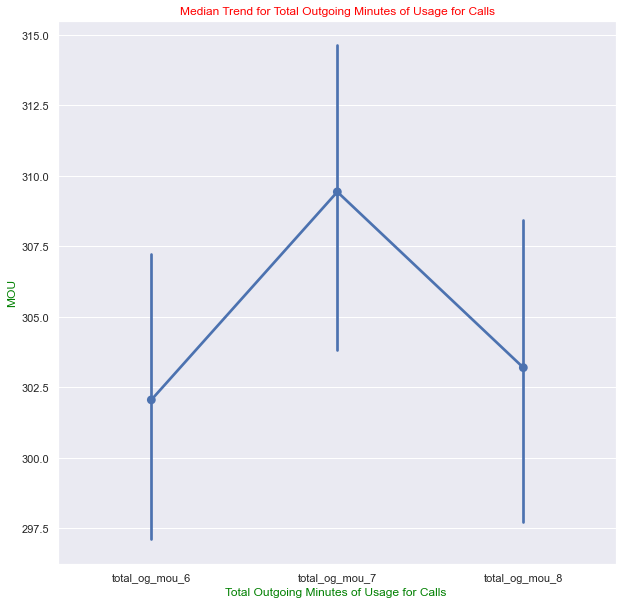

In [75]:
auto_boxplots(df_test,"total_og_mou_6","total_og_mou_7","total_og_mou_8","Total Outgoing Minutes of Usage for Calls","MOU")

**Obsrvations**
- The median value for outgoing call MOU reduces from month 6 to 7 and leaset for month 8

## Total Recharge Number

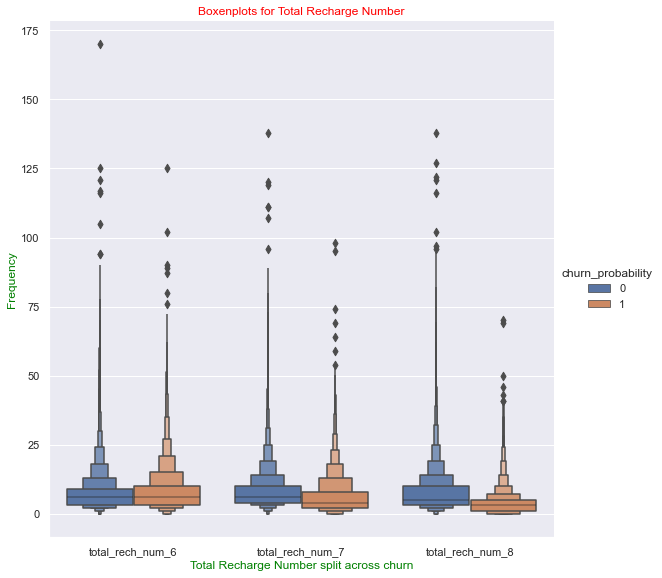

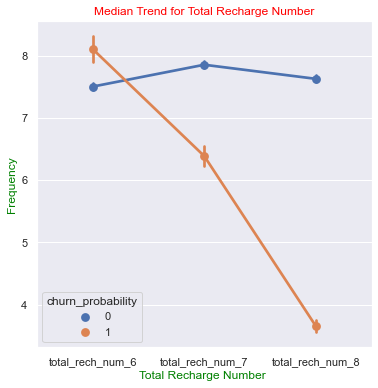

In [76]:
## Box plot for Total Recharge Numbers segmented for Churn Probability and Trend of median values for month 6, 7, and 8
auto_factorplots(df_train,"total_rech_num_6","total_rech_num_7","total_rech_num_8","Total Recharge Number","Frequency")

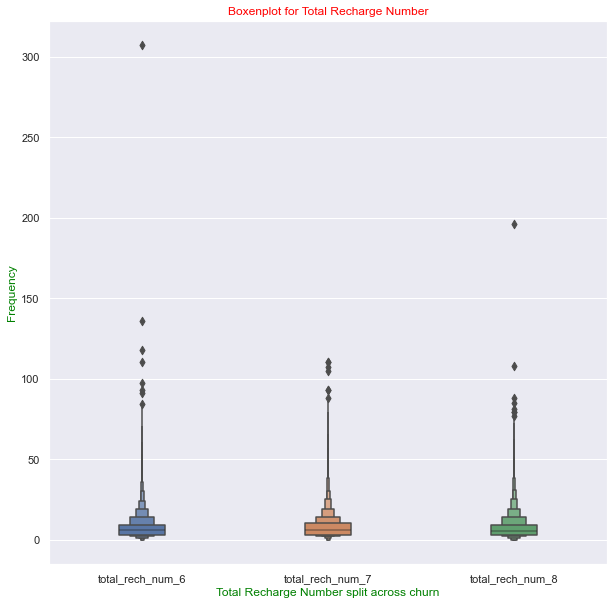

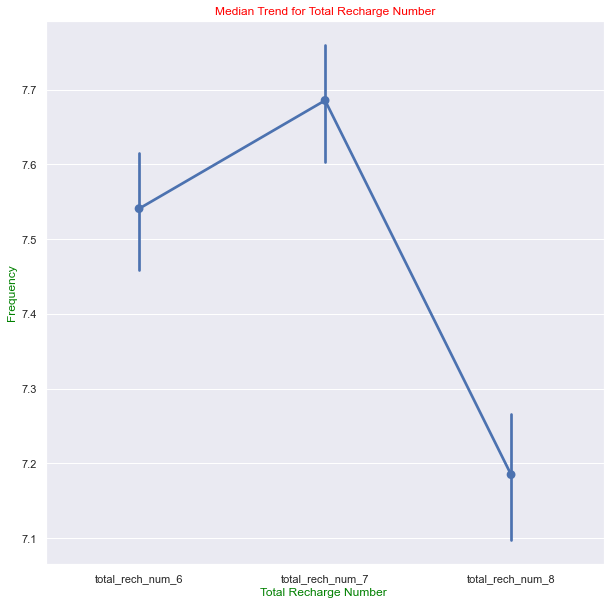

In [77]:
auto_boxplots(df_test,"total_rech_num_6","total_rech_num_7","total_rech_num_8","Total Recharge Number","Frequency")

**Obsrvations**
- The median value for Total number of recharges reduces from month 6 to 7 and leaset for month 8

## Total Recharge Amount

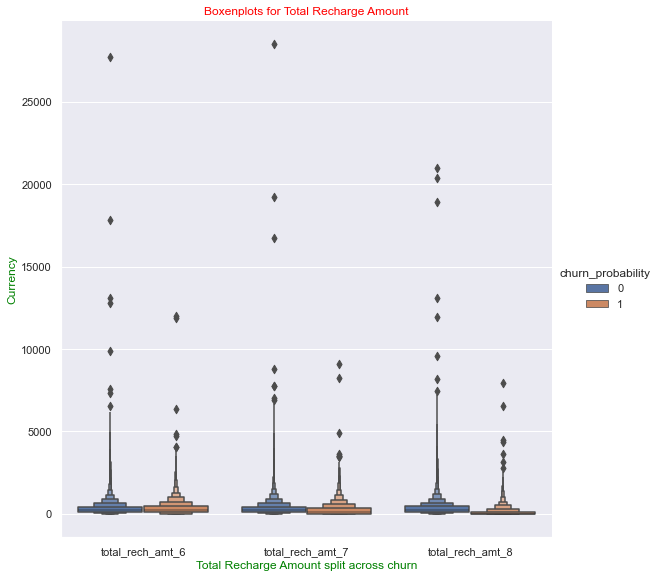

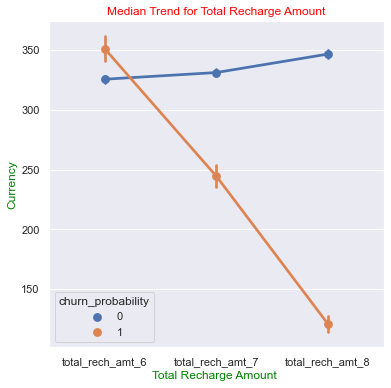

In [78]:
## Box plot for Total Recharge Amountsegmented for Churn Probability and Trend of median values for month 6, 7, and 8
auto_factorplots(df_train,"total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","Total Recharge Amount","Currency")

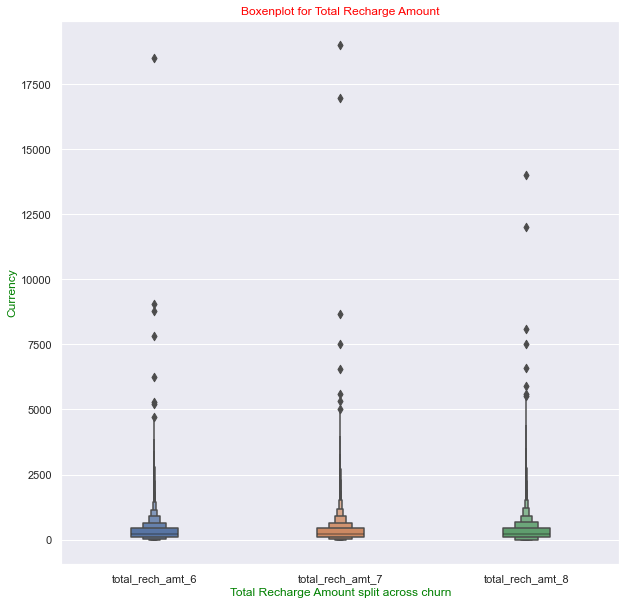

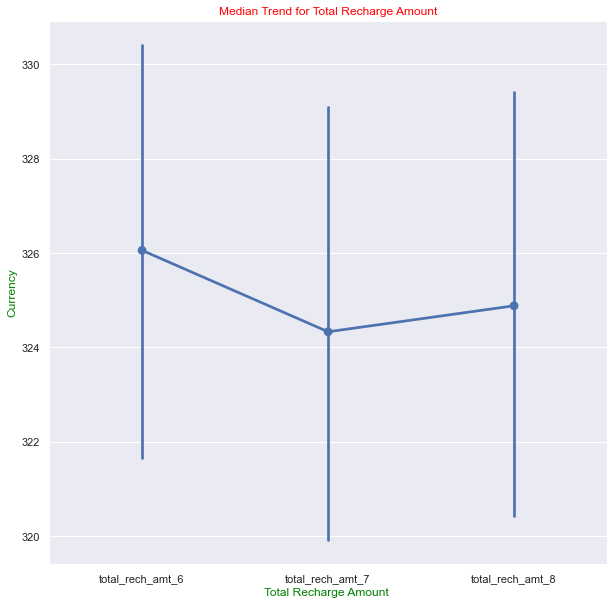

In [79]:
auto_boxplots(df_test,"total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","Total Recharge Amount","Currency")

**Obsrvations**
- The median value for Total Amount recharged reduces from month 6 to 7 and leaset for month 8

## %Change in Total amount recharged month-on-month

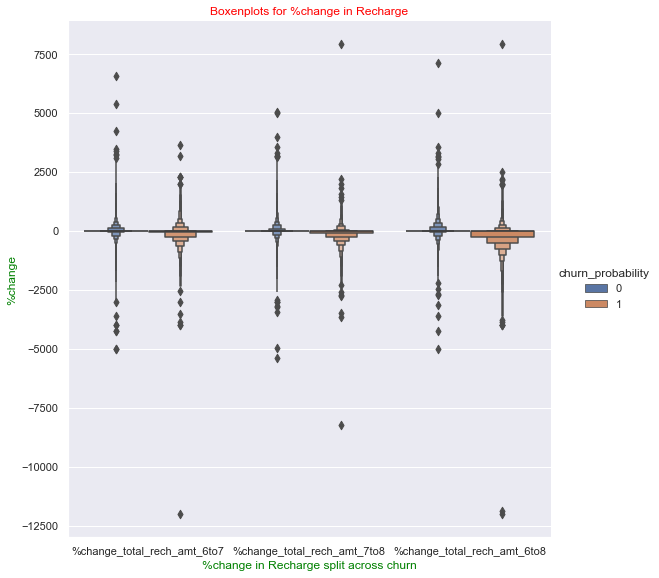

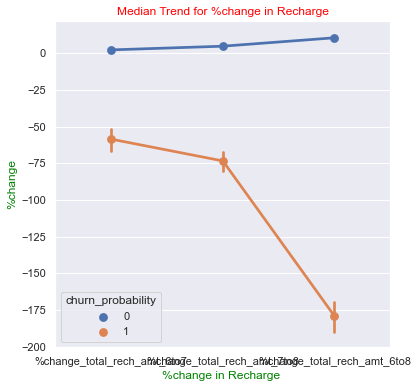

In [80]:
## Box plot for % Change in Total Amount Recharge for Churn Probability and Trend of median values for month 6, 7, and 8
auto_factorplots(df_train,"%change_total_rech_amt_6to7","%change_total_rech_amt_7to8","%change_total_rech_amt_6to8","%change in Recharge","%change")

**Obsrvations**
- The %change in the Amount recharged reduced month-on-month reduced from month 6 to 7 and leaset for month 8 for churn customer

## %Change to total recharge count month-on-month

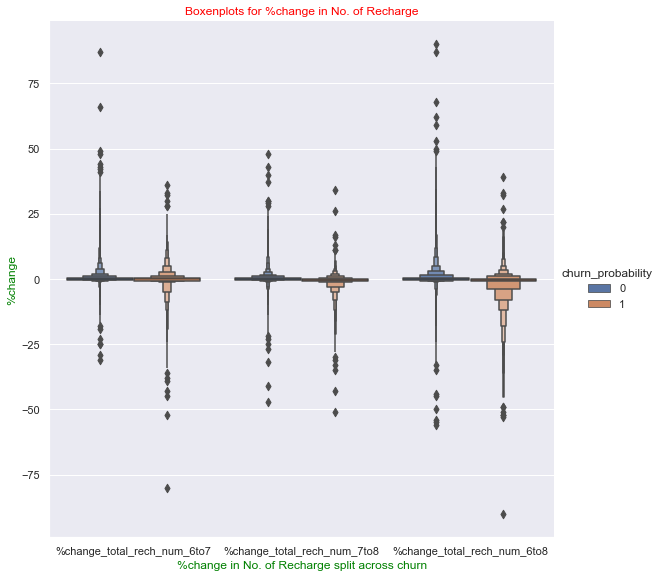

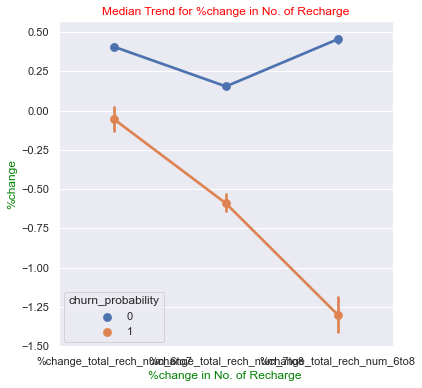

In [81]:
## Box plot for % Change in Total Recharge Count for Churn Probability and Trend of median values for month 6, 7, and 8
auto_factorplots(df_train,"%change_total_rech_num_6to7","%change_total_rech_num_7to8","%change_total_rech_num_6to8","%change in No. of Recharge","%change")

**Obsrvations**
- The %change in the Number of recharges reduced month-on-month reduced from month 6 to 7 and leaset for month 8 for churn customer

# Model Development

## Base model with unbalanced data and with all the features

In [82]:
# Splitting the Target Column and rest for the Train Data set
y = df_train.pop("churn_probability")

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 304 entries, arpu_6 to day_last_rech_data_8
dtypes: float64(161), int32(129), int64(14)
memory usage: 130.5 MB


In [84]:
## extracting the list of columns for scalling 

scale_cols = df_train.select_dtypes(include=['float64']).columns.values
scale_cols

array(['arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'sachet_2g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       '%change_arpu_6to7', '%change_arpu_7to8', '%change_arpu_6to8',
       '%change_onnet_mou_6to7', '%change_onnet_mou_7to8',
       '%change_onnet_mou_6to8', '%change_offnet_mou_6to7',
       '%change_offnet_mou_7to8', '%change_offnet_mou_6to8',
       '%change_roam_ic_mou_6to7', '%change_roam_ic_mou_7to8',
       '%change_roam_ic_mou_6to8', '%change_roam_og_mou_6to7',
       '%change_roam_og_mou_7to8', '%change_roam_og_mou_6to8',
       '%change_loc_og_t2t_mou_6to7', '%change_loc_og_t2t_mou_7to8',
       '%change_loc_og_t2

In [85]:
## Using RobustScaler as we have extreme values

scaler = RobustScaler()
df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])
df_test[scale_cols] = scaler.transform(df_test[scale_cols])

In [86]:
df_train.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,%change_arpu_6to7,%change_arpu_7to8,%change_arpu_6to8,change_arpu_6to7,change_arpu_7to8,change_arpu_6to8,%change_onnet_mou_6to7,%change_onnet_mou_7to8,%change_onnet_mou_6to8,change_onnet_mou_6to7,change_onnet_mou_7to8,change_onnet_mou_6to8,%change_offnet_mou_6to7,%change_offnet_mou_7to8,%change_offnet_mou_6to8,change_offnet_mou_6to7,change_offnet_mou_7to8,change_offnet_mou_6to8,%change_roam_ic_mou_6to7,%change_roam_ic_mou_7to8,%change_roam_ic_mou_6to8,change_roam_ic_mou_6to7,change_roam_ic_mou_7to8,change_roam_ic_mou_6to8,%change_roam_og_mou_6to7,%change_roam_og_mou_7to8,%change_roam_og_mou_6to8,change_roam_og_mou_6to7,change_roam_og_mou_7to8,change_roam_og_mou_6to8,%change_loc_og_t2t_mou_6to7,%change_loc_og_t2t_mou_7to8,%change_loc_og_t2t_mou_6to8,change_loc_og_t2t_mou_6to7,change_loc_og_t2t_mou_7to8,change_loc_og_t2t_mou_6to8,%change_loc_og_t2m_mou_6to7,%change_loc_og_t2m_mou_7to8,%change_loc_og_t2m_mou_6to8,change_loc_og_t2m_mou_6to7,change_loc_og_t2m_mou_7to8,change_loc_og_t2m_mou_6to8,%change_loc_og_t2f_mou_6to7,%change_loc_og_t2f_mou_7to8,%change_loc_og_t2f_mou_6to8,change_loc_og_t2f_mou_6to7,change_loc_og_t2f_mou_7to8,change_loc_og_t2f_mou_6to8,%change_loc_og_t2c_mou_6to7,%change_loc_og_t2c_mou_7to8,%change_loc_og_t2c_mou_6to8,change_loc_og_t2c_mou_6to7,change_loc_og_t2c_mou_7to8,change_loc_og_t2c_mou_6to8,%change_loc_og_mou_6to7,%change_loc_og_mou_7to8,%change_loc_og_mou_6to8,change_loc_og_mou_6to7,change_loc_og_mou_7to8,change_loc_og_mou_6to8,%change_std_og_t2t_mou_6to7,%change_std_og_t2t_mou_7to8,%change_std_og_t2t_mou_6to8,change_std_og_t2t_mou_6to7,change_std_og_t2t_mou_7to8,change_std_og_t2t_mou_6to8,%change_std_og_t2m_mou_6to7,%change_std_og_t2m_mou_7to8,%change_std_og_t2m_mou_6to8,change_std_og_t2m_mou_6to7,change_std_og_t2m_mou_7to8,change_std_og_t2m_mou_6to8,%change_std_og_t2f_mou_6to7,%change_std_og_t2f_mou_7to8,%change_std_og_t2f_mou_6to8,change_std_og_t2f_mou_6to7,change_std_og_t2f_mou_7to8,change_std_og_t2f_mou_6to8,%change_std_og_mou_6to7,%change_std_og_mou_7to8,%change_std_og_mou_6to8,change_std_og_mou_6to7,change_std_og_mou_7to8,change_std_og_mou_6to8,%change_isd_og_mou_6to7,%change_isd_og_mou_7to8,%change_isd_og_mou_6to8,change_isd_og_mou_6to7,change_isd_og_mou_7to8,change_isd_og_mou_6to8,%change_spl_og_mou_6to7,%change_spl_og_mou_7to8,%change_spl_og_mou_6to8,change_spl_og_mou_6to7,change_spl_og_mou_7to8,change_spl_og_mou_6to8,%change_og_others_6to7,%change_og_others_7to8,%change_og_others_6to8,change_og_others_6to7,change_og_others_7to8,change_og_others_6to8,%change_total_og_mou_6to7,%change_total_og_mou_7to8,%change_total_og_mou_6to8,change_total_og_mou_6to7,change_total_og_mou_7to8,change_total_og_mou_6to8,%change_loc_ic_t2t_mou_6to7,%change_loc_ic_t2t_mou_7to8,%change_loc_ic_t2t_mou_6to8,change_loc_ic_t2t_mou_6to7,change_loc_ic_t2t_mou_7to8,change_loc_ic_t2t_mou_6to8,%change_loc_ic_t2m_mou_6to7,%change_loc_ic_t2m_mou_7to8,%change_loc_ic_t2m_mou_6to8,change_loc_ic_t2m_mou_6to7,change_loc_ic_t2m_mou_7to8,change_loc_ic_t2m_mou_6to8,%change_loc_ic_t2f_mou_6to7,%change_loc_ic_t2f_mou_7to8,%change_loc_ic_t2f_mou_6to8,change_loc_ic_t2f_mou_6to7,change_loc_ic_t2f_mou_7to8,change_loc_ic_t2f_mou_6to8,%change_loc_ic_mou_6to7,%change_loc_ic_mou_7to8,%change_loc_ic_mou_6to8,change_loc_ic_mou_6to7,change_loc_ic_mou_7to8,change_loc_ic_mou_6to8,%change_std_ic_t2t_mou_6to7,%change_std_ic_t2t_mou_7to8,%change_std_ic_t2t_mou_6to8,change_std_ic_t2t_mou_6to7,change_std_ic_t2t_mou_7to8,change_std_ic_t2t_mou_6

In [87]:
## Helper function to print the result metrics 

def results(y_true, y_pred, y_proba):
    print("Accuracy : {:.2%}".format(accuracy_score(y_true, y_pred)))
    print('Precision : {:.3%}'.format(precision_score(y_true, y_pred)))
    print('Recal : {:.3%}'.format(recall_score(y_true, y_pred)))
    print('F1 score : {:.3%}'.format(f1_score(y_true, y_pred)))
    print('AUC : {:.3%}'.format(roc_auc_score(y_true, y_proba)))
    print("\nClassification Report : \n", classification_report(y_true, y_pred))
    cm = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=['Actual-0', 'Actual-1'], index = ['Pred-0', 'Pred-1'])
    print("Confusion Metrix \n")
    print(cm)

### Splitting the data into Train and Validation set

In [168]:
X_train, X_val, y_train, y_val = train_test_split(df_train, y, train_size=0.8, 
                                                  stratify=y, shuffle=True, random_state=0)
print("Train Size : ", X_train.shape)
print("Val Size :", X_val.shape)

Train Size :  (55999, 304)
Val Size : (14000, 304)


In [89]:
print("Label proportion in Train data :\n", y_train.value_counts())
print("\nLabel proportion in Val data :\n", y_val.value_counts())

Label proportion in Train data :
 0    50293
1     5706
Name: churn_probability, dtype: int64

Label proportion in Val data :
 0    12574
1     1426
Name: churn_probability, dtype: int64


### Logistic Regression

In [225]:
%%time

## Building Logistic Regression Model with RepeatedStratifiedKFlod Cross Validation

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
lr = LogisticRegressionCV(random_state=0, cv=cv, n_jobs=-1)

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_train_proba = lr.predict_proba(X_train)

CPU times: total: 9.59 s
Wall time: 5min 55s


In [226]:
## Printing the results
print("Train data results ::")
results(y_train, y_train_pred, y_train_proba[:,1])

Train data results ::
Accuracy : 92.08%
Precision : 71.988%
Recal : 36.435%
F1 score : 48.383%
AUC : 85.194%

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     50293
           1       0.72      0.36      0.48      5706

    accuracy                           0.92     55999
   macro avg       0.83      0.67      0.72     55999
weighted avg       0.91      0.92      0.91     55999

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     49484       809
Pred-1      3627      2079


In [227]:
## predicting on the validation data

y_val_pred = lr.predict(X_val)
y_val_proba = lr.predict_proba(X_val)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred, y_val_proba[:,1])

Validation data results ::
Accuracy : 92.02%
Precision : 70.573%
Recal : 37.167%
F1 score : 48.691%
AUC : 84.112%

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     12574
           1       0.71      0.37      0.49      1426

    accuracy                           0.92     14000
   macro avg       0.82      0.68      0.72     14000
weighted avg       0.91      0.92      0.91     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     12353       221
Pred-1       896       530


In [233]:
## Making prediction for test dataset

y_test_pred = lr.predict(df_test)
lr_base_pred = pd.DataFrame(columns=['id', 'churn_probability'])
lr_base_pred['id'] = df_test.index.values
lr_base_pred['churn_probability'] = y_test_pred
lr_base_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [237]:
## Saving the output file
lr_base_pred.to_csv("lr_base_prediction.csv")
lr_base_pred['churn_probability'].value_counts(normalize=True)

0    0.967
1    0.033
Name: churn_probability, dtype: float64

**Observation**

- Though the accuracy is resonably good, the F1-score and Recal is vary poor, we can attribute this to imbalanced data
- We need to compensate for the data imbalance, we will use following approaches
    -- Will used sample weights
    -- Balanced data
- There is scope for further improving the prediction performance using more complex models and hyperparameter tuning
- We will use the following algos for improing the prediction performance
    - Tuned Logistic Regression
    - Tuned RF
    - Tune XGBoost
    - Stacking
    

**Feature Selection Approach**

- Will use Recursive Feature Elimination Technique to remove insignificant featrues first and then will manually analysis significance of each feature to be retained for the modeling, based on p-value and VIF value.
- p-value < 0.05 and VIF <= 5 will be used as the critiria for retaining the feature in the modeling

In [93]:
## Deciding the number of features to start with while using REF technique
%%time
# Adj_r2 = []
# for n in np.arange(1, df_train.shape[1]+1, 5):
#     lr = LogisticRegression(random_state=0, n_jobs=-1)
#     lm_rfe = RFE(lr, n_features_to_select=n)
#     lm_rfe.fit(df_train, y_train)
#     rfe_cols = df_train.columns[lm_rfe.support_]
#     X_train_rfe = df_train[rfe_cols]
#     lm = lr.fit(X_train_rfe, y_train)
#     y_train_pred = lm.predict(X_train_rfe)
#     r2 = r2_score(y_train, y_train_pred)
#     Adj_r2.append(1 - (1-r2) * (X_train_rfe.shape[0]-1)/(X_train_rfe.shape[0]-X_train_rfe.shape[1]-1))

UsageError: Line magic function `%%time` not found.


In [ ]:
## Plotting the Adjusted R2 for different number of features used in the model
# plt.plot(Adj_r2)
# plt.xlabel('Number of features used in the model')
# plt.ylabel('Adjusted R2');

In [ ]:
# print('Max Adjususted R2 : %.3f' %np.max(Adj_r2))
# print('Number of features that resulted in max Adjusted R2 : ', np.argmax(Adj_r2))

**PS:**

- We have tried to run the RFE on the training data, it is taking more than few hours to complete the tasks
- In the interest of time, we have abandanded this method and using an alternate method
- Alternatively we will use RF/XGboost to build a resonably good performing model and using built-in-function to select top K features.
- Using these top K features we will build the Logistic Regression Model to achieve the explainability / understand the relationship between Predictor Variables and Target Variable

## Label Balancing 

- Create couple of dataset using differnt balancing technique - SVMSMOTE, ADASYN

In [94]:
print(X_train.shape)
print(y_train.value_counts())

(55999, 304)
0    50293
1     5706
Name: churn_probability, dtype: int64


### Upsampling minority class using Synthetic Minority Oversampling Technique (SMOTE) - SVMSMOTE

In [95]:
%%time

### Resampling minority Class using SVMSMOTE

svmsmote = SVMSMOTE(sampling_strategy='minority', random_state=0,
                     k_neighbors=5, n_jobs=-1, m_neighbors=10,)

X_train_SS, y_train_SS = svmsmote.fit_resample(X_train, y_train)

print(X_train_SS.shape)
print(y_train_SS.value_counts())

(100586, 304)
0    50293
1    50293
Name: churn_probability, dtype: int64
CPU times: total: 4min 12s
Wall time: 3min 37s


In [96]:
### Saving the data files for future loads to save time

X_train_SS.to_csv("X_train_SS.csv")
y_train_SS.to_csv("y_train_SS.csv")

### Loading the saved files 

# X_train_SS = pd.read_csv("X_train_SS.csv", index_col=0)
# y_train_SS = pd.read_csv("y_train_SS.csv", index_col=0)

## model for interpretation
- We have used RandomForest Model to extract the Feature of Importance
- We used top 20 features from this to build the Logistic Regression model to understand the explainability 

In [ ]:
## Building a Random Forest Model to obtain Feature of Importance

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
params = {"max_depth": [3,4,5],"n_estimators": [10,25,50,75,100,150,200,250]}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = cv,
                           n_jobs=-1, verbose=1, scoring="accuracy")

Wall time: 999 µs


In [ ]:
%%time
grid_search.fit(X_train_SS, y_train_SS)

Fitting 30 folds for each of 24 candidates, totalling 720 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [10, 25, 50, 75, 100, 150, 200, 250]},
             scoring='accuracy', verbose=1)

In [ ]:
## Best score and best model

print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.9232497562452715


RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [ ]:
feat_imp_df = pd.DataFrame({
    "Varname": X_train_SS.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
feat_imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
11,total_og_mou_8,0.074804
17,total_rech_amt_8,0.061719
144,%change_total_og_mou_6to8,0.053440
198,%change_total_ic_mou_6to8,0.052288
200,change_total_ic_mou_7to8,0.049455
...,...,...
141,change_og_others_6to8,0.000000
20,night_pck_user_8,0.000000
30,sachet_3g_6,0.000000
137,%change_og_others_7to8,0.000000


In [ ]:
##printing results
y_train_pred_rf = rf_best.predict(X_train_SS)
y_train_proba_rf  = rf_best.predict_proba(X_train_SS)
print("Train data results ::")
results(y_train_SS, y_train_pred_rf, y_train_proba_rf[:,1])

Train data results ::
Accuracy : 92.32%
Precision : 93.033%
Recal : 91.496%
F1 score : 92.258%
AUC : 97.152%

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     50293
           1       0.93      0.91      0.92     50293

    accuracy                           0.92    100586
   macro avg       0.92      0.92      0.92    100586
weighted avg       0.92      0.92      0.92    100586

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     46847      3446
Pred-1      4277     46016


In [ ]:
y_val_pred_rf = rf_best.predict(X_val)
y_val_proba_rf = rf_best.predict_proba(X_val)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred_rf, y_val_proba_rf[:,1])

Validation data results ::
Accuracy : 91.46%
Precision : 56.050%
Recal : 75.035%
F1 score : 64.168%
AUC : 92.175%

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95     12574
           1       0.56      0.75      0.64      1426

    accuracy                           0.91     14000
   macro avg       0.77      0.84      0.80     14000
weighted avg       0.93      0.91      0.92     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     11735       839
Pred-1       356      1070


In [48]:
## Selecting top 20 features based on Feature Importance
proposed_important_variables = ["total_rech_amt_8","%change_total_og_mou_6to8",
                                "%change_total_ic_mou_6to8","arpu_8","%change_arpu_6to8",
                                "change_last_day_rch_amt_6to8","%change_total_rech_amt_6to8",
                                "change_spl_og_mou_6to8","%change_arpu_7to8","%change_roam_ic_mou_6to8",
                                "total_og_mou_7","%change_max_rech_amt_6to8","change_roam_ic_mou_6to8",
                                "%change_total_rech_amt_7to8","%change_roam_og_mou_7to8","change_arpu_6to8",
                                "%change_roam_og_mou_6to8","%change_total_rech_num_6to8","day_last_rech_8",
                                "%change_last_day_rch_amt_6to8","%change_loc_ic_mou_6to8"]

In [49]:
## Subsetting the training data
X_train_SS_imp_var = X_train_SS[proposed_important_variables]

In [51]:
## Subsetting Validation and Test Data

X_val_imp_var = X_val[proposed_important_variables]
df_test_imp_var = df_test[proposed_important_variables]

In [58]:
## Training the Logistic Regression Model 

X_train_sm = sm.add_constant(X_train_SS_imp_var)
logm1 = sm.GLS(y_train_SS,X_train_sm,family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.267
Model:                            GLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1742.
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        11:08:06   Log-Likelihood:                -57400.
No. Observations:              100586   AIC:                         1.148e+05
Df Residuals:                  100564   BIC:                         1.151e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4977      0.002    236.501      0.000       0.494       0.502
total_rech_amt_8                 -0.0684      0.005    -13.688      0.000      -0.078      -0.059
%change_total_og_mou_6to8     -2.599e-05   2.11e-06    -12.330      0.000   -3.01e-05   -2.19e-05
%change_total_ic_mou_6to8        -0.0001    7.8e-06    -17.546      0.000      -0.000      -0.000
arpu_8                           -0.0230      0.005     -4.856      0.000      -0.032      -0.014
%change_arpu_6to8              3.193e-06   2.63e-06      1.213      0.225   -1.97e-06    8.35e-06
change_last_day_rch_amt_6to8     -0.2288      0.004    -57.327      0.000      -0.237      -0.221
%change_total_rech_amt_6to8      -0.0001   6.53e-06    -20.156      0.000      -0.000      -0.000
change_spl_og_mou_6to8           -0.1408      0.004    -35.082      0.000      -0.149      -0.133
%change_arpu_7to8             -6.838e-06   2.55e-06     -2.684      0.007   -1.18e-05   -1.85e-06
%change_roam_ic_mou_6to8          0.0001   2.36e-05      4.418      0.000    5.81e-05       0.000
total_og_mou_7                   -0.0047      0.001     -3.975      0.000      -0.007      -0.002
%change_max_rech_amt_6to8      6.366e-05   1.39e-05      4.581      0.000    3.64e-05    9.09e-05
change_roam_ic_mou_6to8           0.0701      0.002     29.519      0.000       0.065       0.075
%change_total_rech_amt_7to8   -7.304e-05   7.27e-06    -10.046      0.000   -8.73e-05   -5.88e-05
%change_roam_og_mou_7to8          0.0004   3.05e-05     14.168      0.000       0.000       0.000
change_arpu_6to8                 -0.1573      0.003    -45.352      0.000      -0.164      -0.150
%change_roam_og_mou_6to8       9.126e-05   2.13e-05      4.292      0.000    4.96e-05       0.000
%change_total_rech_num_6to8       0.0128      0.001     24.636      0.000       0.012       0.014
day_last_rech_8                   0.0002   3.56e-06     53.190      0.000       0.000       0.000
%change_last_day_rch_amt_6to8     0.0004   2.56e-05     14.666      0.000       0.000       0.000
%change_loc_ic_mou_6to8        3.984e-05   1.39e-05      2.873      0.004    1.27e-05     6.7e-05
==============================================================================
Omnibus:                      297.782   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.499
Skew:                           0.116   Prob(JB):                     8.30e-64
Kurtosis:                       2.876   Cond. No.                     3.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might 

In [60]:
X_val_sm = sm.add_constant(X_val_imp_var)

In [66]:
y_val_pred_lm_imp = logm1.predict(X_val_sm)

In [71]:
y_val_pred_lm_imp = y_val_pred_lm_imp.apply(lambda x: 0 if x<0.5 else 1)

In [73]:
print("Accuracy : {:.2%}".format(accuracy_score(y_val, y_val_pred_lm_imp)))
print('Precision : {:.3%}'.format(precision_score(y_val, y_val_pred_lm_imp)))

Accuracy : 72.67%
Precision : 23.298%


**Obsrvations**
- We can see that top 20 features selected from Random Forest gets an accuracy of 72%. This can be used to understand the relationship between Target Variable and Predictor features
- As we can observe from the co-efficient values following features are good indicators of probability to churn `change_last_day_rch_amt_6to8`, `change_arpu_6to8`, `change_spl_og_mou_6to8`, 

## model for Prediction

- Will use PCA to extract optimal number of Principal Components to buid the models
- Simple to Complex models will be built - Logistic Regression, Random Forest, XGBoost and Ensemble of these models
- Performances are tabulated for selecting the best models 

### Running PCA to reduce the dimentionality of the data

CPU times: total: 7.75 s
Wall time: 1.59 s


Text(0, 0.5, '% of Variance Explained')

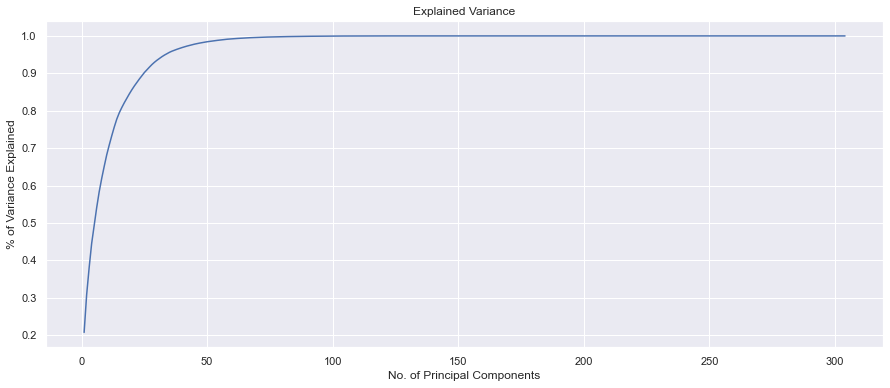

In [189]:
%%time
## fitting the PCA on the balanced data

pca = PCA(random_state=0)

pca.fit(X_train_SS)

## Ploting the cumulative explained variance ratio

var_cumu = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(var_cumu)+1), var_cumu)
plt.title("Explained Variance")
plt.xlabel('No. of Principal Components')
plt.ylabel('% of Variance Explained');

### Selecting the number of Principal Components (PCs)

- The Scree plot is rather smooth to find the exact position of elbow. However we can see a smooth bend between 30 and 40
- We will examin the total variance explained at these levels
- We will also refer the `Kaiser-Guttman criterion` to check the suitable number of PCs - which says neglect all the PCs that explains <1% variance in the data

In [162]:
print("20 PCs explains : {:.3%} varaince".format(var_cumu[19]))
print("30 PCs explains : {:.3%} varaince".format(var_cumu[29]))
print("40 PCs explains : {:.3%} varaince".format(var_cumu[39]))
print("50 PCs explains : {:.3%} varaince".format(var_cumu[49]))

20 PCs explains : 85.598% varaince
30 PCs explains : 93.496% varaince
40 PCs explains : 96.887% varaince
50 PCs explains : 98.444% varaince


In [134]:
## using Kaiser rule retaining all PCs that explains >1% variance 

pc_KG = pca.explained_variance_ratio_[pca.explained_variance_ratio_>=0.01]
print("No. of PCs as per Kaiser-Guttman Criteria : ", len(pc_KG))
print('% of variance explained by {} PCs = {:.3%}'.format(len(pc_KG), np.sum(pc_KG)))

No. of PCs as per Kaiser-Guttman Criteria :  21
% of variance explained by 21 PCs = 86.618%


In [160]:
## finding number of PCs that explains 95% of variance in the data
opt_pc = np.where(var_cumu>=0.95)[0][0]

print("{} PCs explains {:.3%} varaince in the data".format(opt_pc, var_cumu[opt_pc]))

33 PCs explains 95.256% varaince in the data


**Observations**
- As per Kaiser-Guttman criterion 21 Pricipal Components (PCs) explains 86.62% of varaince in the data, which is less for the purpose of building a good performing predictive model
- 50 PCs explains 98.44% of data, which is a good number, but have more dimentions 
- 33 PCs explains 95.3% of variance in the data, which seems right
- However it is worth investigating with both 33 PCs and 50 PCs

### Creating 33 PCs

In [171]:
%%time
### Creating 33 PCs

pca_33 = IncrementalPCA(n_components=33)
X_train_33 = pca_33.fit_transform(X_train_SS)
X_val_33 = pca_33.transform(X_val)
X_test_33 = pca_33.transform(df_test)

print("Train data shape: ", X_train_33.shape)
print("Val data shape: ", X_val_33.shape)
print("Test data shape: ", X_test_33.shape)

Train data shape:  (100586, 33)
Val data shape:  (14000, 33)
Test data shape:  (30000, 33)
CPU times: total: 15.2 s
Wall time: 2.68 s


CPU times: total: 1.19 s
Wall time: 251 ms


<AxesSubplot:>

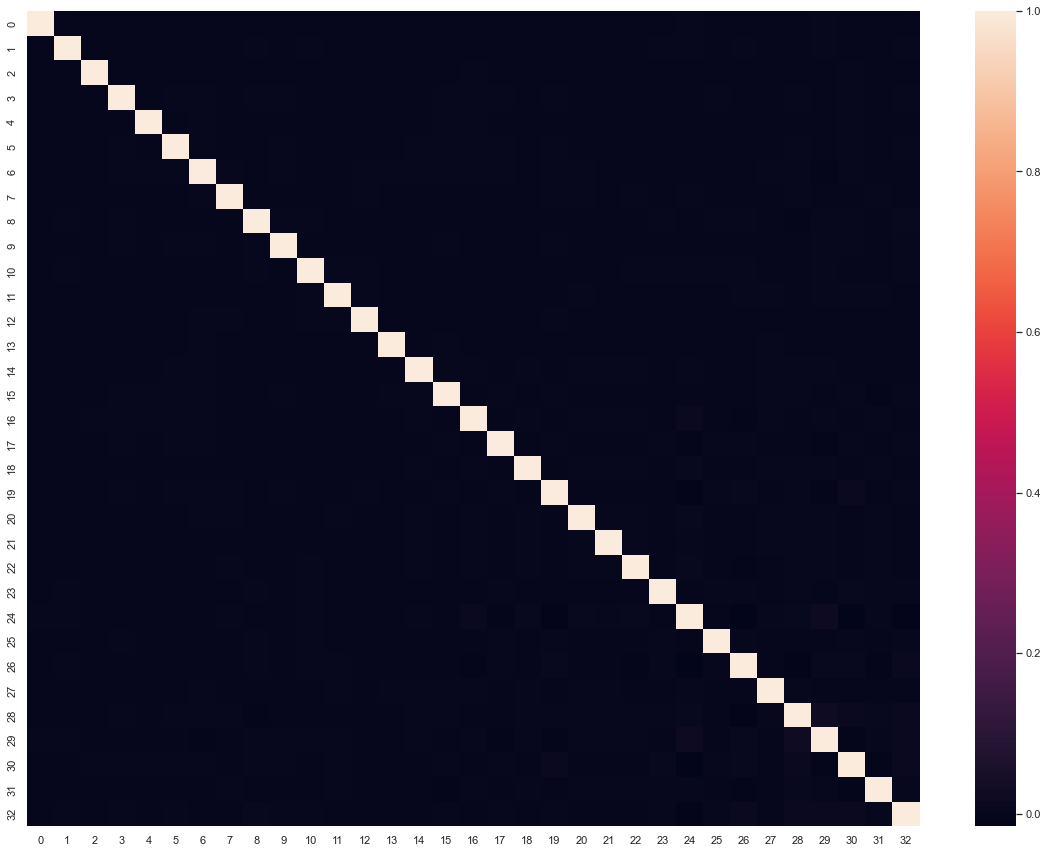

In [174]:
## ploting the correlation among 33 PCs

corrmat = np.corrcoef(X_train_33.transpose())
plt.figure(figsize=[20,15]);
sns.heatmap(corrmat);

### Building Logistic Regression Model using 33 PCs

In [175]:
%%time

## Building Logistic Regression Model with RepeatedStratifiedKFlod Cross Validation for 33 PCs

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
lr = LogisticRegressionCV(random_state=0, cv=cv, n_jobs=-1)

lr.fit(X_train_33, y_train_SS)
y_train_pred = lr.predict(X_train_33)
y_train_proba = lr.predict_proba(X_train_33)

## Printing the results
print("Train data results ::")
results(y_train_SS, y_train_pred, y_train_proba[:,1])

Train data results ::
Accuracy : 78.20%
Precision : 80.183%
Recal : 74.927%
F1 score : 77.466%
AUC : 85.434%

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.81      0.79     50293
           1       0.80      0.75      0.77     50293

    accuracy                           0.78    100586
   macro avg       0.78      0.78      0.78    100586
weighted avg       0.78      0.78      0.78    100586

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     40980      9313
Pred-1     12610     37683
CPU times: total: 2.56 s
Wall time: 16.7 s


In [176]:
## predicting on the validation data

y_val_pred = lr.predict(X_val_33)
y_val_proba = lr.predict_proba(X_val_33)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred, y_val_proba[:,1])

Validation data results ::
Accuracy : 79.63%
Precision : 28.459%
Recal : 66.059%
F1 score : 39.780%
AUC : 80.385%

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88     12574
           1       0.28      0.66      0.40      1426

    accuracy                           0.80     14000
   macro avg       0.62      0.74      0.64     14000
weighted avg       0.89      0.80      0.83     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     10206      2368
Pred-1       484       942


### Creating 50 PCs

In [177]:
%%time
### Creating 50 PCs

pca_50 = IncrementalPCA(n_components=50)
X_train_50 = pca_50.fit_transform(X_train_SS)
X_val_50 = pca_50.transform(X_val)
X_test_50 = pca_50.transform(df_test)

print("Train data shape: ", X_train_50.shape)
print("Val data shape: ", X_val_50.shape)
print("Test data shape: ", X_test_50.shape)

Train data shape:  (100586, 50)
Val data shape:  (14000, 50)
Test data shape:  (30000, 50)
CPU times: total: 14.7 s
Wall time: 2.59 s


### Building Logistic Regression Model using 50 PCs

In [178]:
%%time

## Building Logistic Regression Model with RepeatedStratifiedKFlod Cross Validation for 50 PCs

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
lr = LogisticRegressionCV(random_state=0, cv=cv, n_jobs=-1)

lr.fit(X_train_50, y_train_SS)
y_train_pred = lr.predict(X_train_50)
y_train_proba = lr.predict_proba(X_train_50)

## Printing the results
print("Train data results ::")
results(y_train_SS, y_train_pred, y_train_proba[:,1])

Train data results ::
Accuracy : 81.31%
Precision : 85.732%
Recal : 75.128%
F1 score : 80.081%
AUC : 87.303%

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82     50293
           1       0.86      0.75      0.80     50293

    accuracy                           0.81    100586
   macro avg       0.82      0.81      0.81    100586
weighted avg       0.82      0.81      0.81    100586

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     44005      6288
Pred-1     12509     37784
CPU times: total: 6.55 s
Wall time: 1min 21s


In [179]:
## predicting on the validation data

y_val_pred = lr.predict(X_val_50)
y_val_proba = lr.predict_proba(X_val_50)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred, y_val_proba[:,1])

Validation data results ::
Accuracy : 85.14%
Precision : 36.910%
Recal : 64.656%
F1 score : 46.993%
AUC : 81.990%

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91     12574
           1       0.37      0.65      0.47      1426

    accuracy                           0.85     14000
   macro avg       0.66      0.76      0.69     14000
weighted avg       0.90      0.85      0.87     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     10998      1576
Pred-1       504       922


### Generting number of PCs that explains 99% of variance in the data

In [181]:
var_cumu[[55, 56, 57, 58, 59, 60]]

array([0.9897124 , 0.99050262, 0.99117249, 0.9917604 , 0.99230464,
       0.99278209])

In [239]:
%%time
### Creating 56 PCs

pca_56 = IncrementalPCA(n_components=56)
X_train_56 = pca_56.fit_transform(X_train_SS)
X_val_56 = pca_56.transform(X_val)
X_test_56 = pca_56.transform(df_test)

print("Train data shape: ", X_train_56.shape)
print("Val data shape: ", X_val_56.shape)
print("Test data shape: ", X_test_56.shape)

Train data shape:  (100586, 56)
Val data shape:  (14000, 56)
Test data shape:  (30000, 56)
CPU times: total: 14.8 s
Wall time: 2.6 s


In [242]:
%%time

## Building Logistic Regression Model with RepeatedStratifiedKFlod Cross Validation for 50 PCs

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
lr = LogisticRegressionCV(random_state=0, cv=cv, n_jobs=-1)

lr.fit(X_train_56, y_train_SS)
y_train_pred = lr.predict(X_train_56)
y_train_proba = lr.predict_proba(X_train_56)

## Printing the results
print("Train data results ::")
results(y_train_SS, y_train_pred, y_train_proba[:,1])

Train data results ::
Accuracy : 81.68%
Precision : 86.255%
Recal : 75.362%
F1 score : 80.441%
AUC : 87.560%

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83     50293
           1       0.86      0.75      0.80     50293

    accuracy                           0.82    100586
   macro avg       0.82      0.82      0.82    100586
weighted avg       0.82      0.82      0.82    100586

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     44253      6040
Pred-1     12391     37902
CPU times: total: 6.92 s
Wall time: 1min 47s


In [243]:
## predicting on the validation data

y_val_pred = lr.predict(X_val_56)
y_val_proba = lr.predict_proba(X_val_56)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred, y_val_proba[:,1])

Validation data results ::
Accuracy : 85.45%
Precision : 37.606%
Recal : 65.007%
F1 score : 47.648%
AUC : 82.454%

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92     12574
           1       0.38      0.65      0.48      1426

    accuracy                           0.85     14000
   macro avg       0.67      0.76      0.70     14000
weighted avg       0.90      0.85      0.87     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     11036      1538
Pred-1       499       927


In [245]:
## Making prediction for test dataset

y_test_pred = lr.predict(X_test_56)
lr_svmsmote_pc56_pred = pd.DataFrame(columns=['id', 'churn_probability'])
lr_svmsmote_pc56_pred['id'] = df_test.index.values
lr_svmsmote_pc56_pred['churn_probability'] = y_test_pred
lr_svmsmote_pc56_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [246]:
## Saving the output file
lr_svmsmote_pc56_pred.to_csv("lr_svmsmote_pc56_pred.csv")
lr_svmsmote_pc56_pred['churn_probability'].value_counts(normalize=True)

0    0.835367
1    0.164633
Name: churn_probability, dtype: float64

## Exploring other Upsampling Techniques - SMOTE, BorderLineSMOTE (1 and 2)

In [196]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [213]:
%%time

### Resampling minority Class using SVMSMOTE

# upsampling = SMOTE(random_state=0)
# upsampling = BorderlineSMOTE(random_state=0, kind='borderline-1')
upsampling = BorderlineSMOTE(random_state=0, kind='borderline-2')

X_train_up, y_train_up = upsampling.fit_resample(X_train, y_train)

print(X_train_up.shape)
print(y_train_up.value_counts())

(100586, 304)
0    50293
1    50293
Name: churn_probability, dtype: int64
CPU times: total: 16.9 s
Wall time: 7.35 s


CPU times: total: 7.64 s
Wall time: 1.66 s


Text(0, 0.5, '% of Variance Explained')

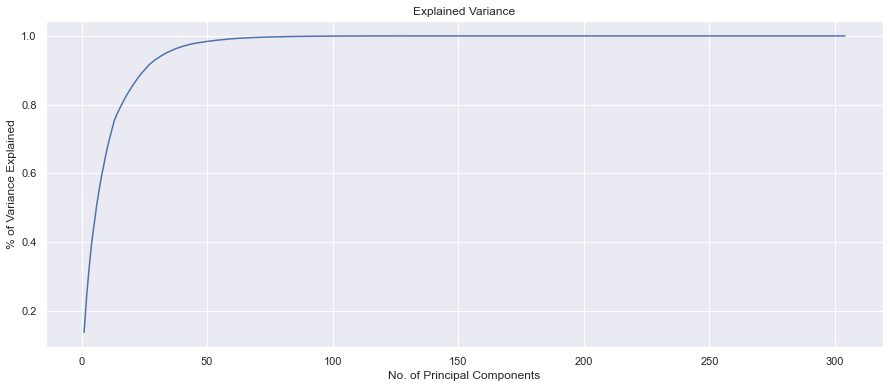

In [214]:
%%time
## fitting the PCA on the balanced data

pca = PCA(random_state=0)

pca.fit(X_train_up)

## Ploting the cumulative explained variance ratio

var_cumu = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(var_cumu)+1), var_cumu)
plt.title("Explained Variance")
plt.xlabel('No. of Principal Components')
plt.ylabel('% of Variance Explained');

In [215]:
var_cumu[[55, 56, 57, 58, 59, 60]]

array([0.9891055 , 0.98982215, 0.99050401, 0.99114912, 0.99174898,
       0.99230446])

In [216]:
%%time
### Creating 56 PCs

pca_56 = IncrementalPCA(n_components=56)
X_train_56 = pca_56.fit_transform(X_train_up)
X_val_56 = pca_56.transform(X_val)
X_test_56 = pca_56.transform(df_test)

print("Train data shape: ", X_train_56.shape)
print("Val data shape: ", X_val_56.shape)
print("Test data shape: ", X_test_56.shape)

Train data shape:  (100586, 56)
Val data shape:  (14000, 56)
Test data shape:  (30000, 56)
CPU times: total: 14.9 s
Wall time: 2.63 s


In [217]:
%%time

## Building Logistic Regression Model with RepeatedStratifiedKFlod Cross Validation for 50 PCs

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
lr = LogisticRegressionCV(random_state=0, cv=cv, n_jobs=-1)

lr.fit(X_train_56, y_train_AD)
y_train_pred = lr.predict(X_train_56)
y_train_proba = lr.predict_proba(X_train_56)

## Printing the results
print("Train data results ::")
results(y_train_AD, y_train_pred, y_train_proba[:,1])

Train data results ::
Accuracy : 73.83%
Precision : 74.288%
Recal : 72.873%
F1 score : 73.574%
AUC : 81.085%

Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74     50293
           1       0.74      0.73      0.74     50293

    accuracy                           0.74    100586
   macro avg       0.74      0.74      0.74    100586
weighted avg       0.74      0.74      0.74    100586

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     37608     12685
Pred-1     13643     36650
CPU times: total: 7.56 s
Wall time: 48 s


In [218]:
## predicting on the validation data

y_val_pred = lr.predict(X_val_56)
y_val_proba = lr.predict_proba(X_val_56)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred, y_val_proba[:,1])

Validation data results ::
Accuracy : 74.46%
Precision : 24.948%
Recal : 75.035%
F1 score : 37.445%
AUC : 82.525%

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.74      0.84     12574
           1       0.25      0.75      0.37      1426

    accuracy                           0.74     14000
   macro avg       0.61      0.75      0.61     14000
weighted avg       0.89      0.74      0.79     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0      9355      3219
Pred-1       356      1070


**Observations**
- Using Logistic Regression as the method to select number of PCs, we found that for 56 Pcs which explains 99%of variance in the data has produced highest accuracy for validation set, even the F1-Score and AUC are higher compared to 33 PCs as well as 50 PCs
- Validation Performance for different number of PCs using Logistic Regression as well for all features as follows;
                     Balancing  Accuracy    Precision     Recall    F1_score     AUC
      All features - None       92.02       70.57         37.16     48.69        84.12
      33 PCs       - SVMSMOTE   79.63       28.46         66.06     39.78        80.38
      50 PCs       - SVMSMOTE   85.14       36.91         64.66     46.99        81.99
      56 PCs       - SVMSMOTE   85.45       37.61         65.01     47.65        82.45  
      56 PCs       - SMOTE      85.25       37.26         65.50     47.50        82.52 
      56 PCS       - BSMOTE-1   74.49       24.87         74.48     37.29        82.38
      56 PCs       - BSMOTE-2   74.46       24.95         75.03     37.45        82.53
 
 - From above tabulation of results we can see that using all features to build the model has the heigher validation accuracy, however we also note that this could be because of the data imbalance 
 - After doing label balancing using various technique and for different number of PCs we see that the best performance obtained is for 56 PCs and SVMSMOTE balancing method

## Building Logistic Regression Model, Tuning Hyper-Parameters

In [279]:
%%time

## Building the RF model with Hyper-parameter Tuning 
## 56 PCs are used as training data

## defining the model
lr = LogisticRegression(random_state=0, n_jobs=-1)

## Using crossvalidation technique 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

## defining the search space
params = {
    'penalty' : ['l2', 'elasticnet'], 
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'C': [100, 10, 1.0, 0.1, 0.01],
}

## deining the GridSearch
lr_grid = GridSearchCV(lr,
                       param_grid=params,
                       cv=cv,
                       n_jobs=-1,
                       scoring='accuracy')

## model training 
lr_grid.fit(X_train_56, y_train_SS)

print(lr_grid.best_score_)

0.816395899279008
CPU times: total: 36.7 s
Wall time: 6min 18s


In [282]:
## Best model

lr_best = lr_grid.best_estimator_
lr_best

LogisticRegression(C=100, n_jobs=-1, random_state=0, solver='liblinear')

In [283]:
## Making Prediction on  Train Dataset

y_train_pred = lr_best.predict(X_train_56)
y_train_proba = lr_best.predict_proba(X_train_56)

## Printing the results
print("Train data results ::")
results(y_train_SS, y_train_pred, y_train_proba[:,1])

Train data results ::
Accuracy : 81.67%
Precision : 86.053%
Recal : 75.581%
F1 score : 80.478%
AUC : 87.563%

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83     50293
           1       0.86      0.76      0.80     50293

    accuracy                           0.82    100586
   macro avg       0.82      0.82      0.82    100586
weighted avg       0.82      0.82      0.82    100586

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     44132      6161
Pred-1     12281     38012


In [284]:
## predicting on the validation data

y_val_pred = lr_best.predict(X_val_56)
y_val_proba = lr_best.predict_proba(X_val_56)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred, y_val_proba[:,1])

Validation data results ::
Accuracy : 85.25%
Precision : 37.194%
Recal : 65.077%
F1 score : 47.335%
AUC : 82.460%

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.88      0.91     12574
           1       0.37      0.65      0.47      1426

    accuracy                           0.85     14000
   macro avg       0.66      0.76      0.69     14000
weighted avg       0.90      0.85      0.87     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     11007      1567
Pred-1       498       928


**Observations**
- We cound not perform the Hyper parameter search for a wider search ranges, however searched for Best C-value, solver and penalty
- No major change in the performance observed 
- Performance Tabulation;
      Algo        Features     Balancing  Accuracy    Precision     Recall    F1_score     AUC
      LR-base     All features None       92.02       70.57         37.16     48.69        84.12
      LR-base     56 PCs       SVMSMOTE   85.45       37.61         65.01     47.65        82.45
      LR-tuned    56 PCs       SVMSMOTE   85.25       37.19         65.08     47.34        82.46 
      
      

## Building Random Forest Model and Tuning Hyper-Parameters

In [286]:
%%time

## Building the RF model with Hyper-parameter Tuning 

## Defining the RF model
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

## defining CV strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

## defining the search space
params = {
    'n_estimators' : [200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [10, 15, 20],
#     'min_samples_leaf': [10, 20, 50, 100, 200],
}


## defining the GridSearch
rf_grid = GridSearchCV(rf,
                       param_grid=params,
                       cv=cv,
                       n_jobs=-1,
                       scoring='accuracy', 
                       )
## model training 
rf_grid.fit(X_train_56, y_train_SS)

print(rf_grid.best_score_)

0.9484620087311774
CPU times: total: 6min 24s
Wall time: 1h 4min 28s


In [287]:
## Best RF Model

rf_best = rf_grid.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=200,
                       n_jobs=-1, random_state=0)

In [288]:
## Predicting on the Train Data

y_train_pred = rf_best.predict(X_train_56)
y_train_proba = rf_best.predict_proba(X_train_56)

## Printing the results
print("Train data results ::")
results(y_train_SS, y_train_pred, y_train_proba[:,1])

Train data results ::
Accuracy : 99.71%
Precision : 99.745%
Recal : 99.676%
F1 score : 99.711%
AUC : 99.995%

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50293
           1       1.00      1.00      1.00     50293

    accuracy                           1.00    100586
   macro avg       1.00      1.00      1.00    100586
weighted avg       1.00      1.00      1.00    100586

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     50165       128
Pred-1       163     50130


In [289]:
## predicting on the validation data

y_val_pred = rf_best.predict(X_val_56)
y_val_proba = rf_best.predict_proba(X_val_56)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred, y_val_proba[:,1])

Validation data results ::
Accuracy : 91.26%
Precision : 56.144%
Recal : 64.727%
F1 score : 60.130%
AUC : 88.980%

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     12574
           1       0.56      0.65      0.60      1426

    accuracy                           0.91     14000
   macro avg       0.76      0.79      0.78     14000
weighted avg       0.92      0.91      0.92     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     11853       721
Pred-1       503       923


In [290]:
## Making prediction for test dataset

y_test_pred = rf_best.predict(X_test_56)
rf_svmsmote_pc56_pred = pd.DataFrame(columns=['id', 'churn_probability'])
rf_svmsmote_pc56_pred['id'] = df_test.index.values
rf_svmsmote_pc56_pred['churn_probability'] = y_test_pred
rf_svmsmote_pc56_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [291]:
## Saving the output file
rf_svmsmote_pc56_pred.to_csv("rf_svmsmote_pc56_pred_1.csv")
rf_svmsmote_pc56_pred['churn_probability'].value_counts(normalize=True)

0    0.893267
1    0.106733
Name: churn_probability, dtype: float64

**Observations**
- We cound not perform the Hyper parameter search for a wider search ranges, however searched for n-estimator, max_depth and criteria
- Performance is better than Logistic Regression
- Performance Tabulation;
      Algo        Features     Balancing  Accuracy    Precision     Recall    F1_score     AUC
      LR-base     All features None       92.02       70.57         37.16     48.69        84.12
      LR-base     56 PCs       SVMSMOTE   85.45       37.61         65.01     47.65        82.45
      LR-tuned    56 PCs       SVMSMOTE   85.25       37.19         65.08     47.34        82.46 
      RF-tuned    56 PCs       SVMSMOTE   91.26       56.14         64.72     60.13        88.98 

## Building XGBoost Model

In [296]:
%%time

## Building the XGB model with Hyper-parameter Tuning 
## 56 PCs are used in the training as feature set

## defining the XGB classifier
xgb = XGBClassifier(random_state=0, n_jobs=-1)

## defining the crossvalidation 
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=0)

## defining the search space
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.05, 0.1, 0.25],
#         'min_child_weight': [1, 5, 7, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 6, 8, 10]
        }

## defining the GridSearch 
xgb_rand = GridSearchCV(xgb,
                        param_grid=params,
                        cv=cv,
                        n_jobs=-1,
                        scoring='accuracy')

xgb_rand.fit(X_train_56, y_train_SS)

print(xgb_rand.best_score_)

CPU times: total: 0 ns
Wall time: 0 ns


In [295]:
## Best XGB Model

xgb_best = xgb_rand.best_estimator_
xgb_best

In [ ]:
## Predicting on the Train Data

y_train_pred = xgb_best.predict(X_train_56)
y_train_proba = xgb_best.predict_proba(X_train_56)

## Printing the results
print("Train data results ::")
results(y_train_SS, y_train_pred, y_train_proba[:,1])

In [ ]:
## predicting on the validation data

y_val_pred = xgb_best.predict(X_val_56)
y_val_proba = xgb_best.predict_proba(X_val_56)

## Printing the results
print("Validation data results ::")
results(y_val, y_val_pred, y_val_proba[:,1])

In [ ]:
## Making prediction for test dataset

y_test_pred = xgb_best.predict(X_test_56)
xgb_svmsmote_pc56_pred = pd.DataFrame(columns=['id', 'churn_probability'])
xgb_svmsmote_pc56_pred['id'] = df_test.index.values
xgb_svmsmote_pc56_pred['churn_probability'] = y_test_pred
xgb_svmsmote_pc56_pred.head()

In [ ]:
## Saving the output file
xgb_svmsmote_pc56_pred.to_csv("xgb_svmsmote_pc56_pred.csv")
xgb_svmsmote_pc56_pred['churn_probability'].value_counts(normalize=True)

**PS**
- We could not complete the hyper-parameter tuning as it was taking more than a day to run

## Ensembling LR, RF, XGBoost and LightGBM models

In [225]:
%%time
xgb = XGBClassifier(random_state=0, n_jobs=-1)
xgb.fit(X_train_SS, y_train_SS)

CPU times: user 2min 9s, sys: 152 ms, total: 2min 9s
Wall time: 2min 9s


In [226]:
%%time
lgbm = LGBMClassifier(random_state=0, n_jobs=-1)

lgbm.fit(X_train_SS, y_train_SS)

CPU times: user 35.8 s, sys: 184 ms, total: 36 s
Wall time: 35.8 s


In [227]:
%%time
base_clf = []
base_clf.append(('lr', LogisticRegression(n_jobs=-1)))
base_clf.append(('rf', RandomForestClassifier(n_jobs=-1)))
base_clf.append(('xgb', xgb))
base_clf.append(('lgbm', lgbm))

final_clf = LogisticRegression()

ensemble = StackingClassifier( estimators=base_clf, final_estimator=final_clf, cv=5, n_jobs=-1)

ensemble.fit(X_train_SS, y_train_SS)

CPU times: user 8.76 s, sys: 2.83 s, total: 11.6 s
Wall time: 21min 19s


In [228]:
y_train_pred = ensemble.predict(X_train_SS)
y_train_proba = ensemble.predict_proba(X_train_SS)

results(y_train_SS, y_train_pred, y_train_proba[:,1])

Accuracy : 100.00%
Precision : 100.000%
Recal : 100.000%
F1 score : 100.000%
AUC : 100.000%

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     62867
           1       1.00      1.00      1.00     62867

    accuracy                           1.00    125734
   macro avg       1.00      1.00      1.00    125734
weighted avg       1.00      1.00      1.00    125734

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     62867         0
Pred-1         0     62867


In [217]:
y_val_pred = ensemble.predict(X_val)
y_val_proba = ensemble.predict_proba(X_val)

results(y_val, y_val_pred, y_val_proba[:,1])

Accuracy : 94.06%
Precision : 74.186%
Recal : 63.885%
F1 score : 68.651%
AUC : 92.326%

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     12574
           1       0.74      0.64      0.69      1426

    accuracy                           0.94     14000
   macro avg       0.85      0.81      0.83     14000
weighted avg       0.94      0.94      0.94     14000

Confusion Metrix 

        Actual-0  Actual-1
Pred-0     12257       317
Pred-1       515       911


In [229]:
y_test_pred = ensemble.predict(df_test)
ensemble_result = pd.DataFrame(columns=['id', 'churn_probability'])
ensemble_result['id'] = df_test.index.values
ensemble_result['churn_probability'] = y_test_pred
ensemble_result.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [230]:
ensemble_result.to_csv(os.path.join(path, 'ensemble_result_2.csv'))
ensemble_result['churn_probability'].value_counts(normalize = True)

0    0.9216
1    0.0784
Name: churn_probability, dtype: float64

**Observations**
- Ensemble of diverse model has improved the prediction performance
- Performance is better than any single model
- Performance Tabulation;
      Algo        Features     Balancing  Accuracy    Precision     Recall    F1_score     AUC
      LR-base     All features None       92.02       70.57         37.16     48.69        84.12
      LR-base     56 PCs       SVMSMOTE   85.45       37.61         65.01     47.65        82.45
      LR-tuned    56 PCs       SVMSMOTE   85.25       37.19         65.08     47.34        82.46 
      RF-tuned    56 PCs       SVMSMOTE   91.26       56.14         64.72     60.13        88.98 
      Ensembled   All features SVMSMOTE   94.06       74.19         63.89     68.65        92.33**

# Conclusion

 - With good feature engineering of the temporal data the model prediction can be further imporved
 - Using Principal Componets for prediction has not resulted in higher prediction performance of the model even after hyper-parameter tuning compared to using raw features as is.
 - As for the explainablity concerned;
     - There is a clear pattern across last 3 months (month 6, 7, and 8) with respect to the call usage, data usage and recharge behaviour of the customer with higher probaility to churn
     - The customer with higher probability to churn exhibit following behaviour as per the data;
         - have reduced recharge amount and total recharge from month 6 to month 8
         - The Average Revenue Per User has significant drop from month 6 to 8
         - The customer with higher median Roaming calls (both incoming and outgoing) MOU has higher tendency to churn
         - Total outgoing call MOU also has significant drop from month 6 to 8
         - Customer who are with network for longer than 1000 days has low tendancy to churn
- These features can be a good indicator for probability to churn

- **Recommendations**

    - Offering discounts on Roaming Charges or special Roaming packages may prevent customer have high roaming usage
    - Offering special discounts on Month 7 and 8 on every recharge could help retaining the customer 
    - Offering special packages to customer who are less than 1000 days old 